# **Downloading Data**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


# **Our Dataset Features**


- **Target: price price in US dollars (\$326--\$18,823)**

- **carat weight of the diamond (0.2--5.01)**

- **cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)**

- **color diamond color, from J (worst) to D (best)**

- **clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**

- **x length in mm (0--10.74)**

- **y width in mm (0--58.9)**

- **z depth in mm (0--31.8)**

- **depth total depth percentage = z / mean(x, y) = 2 \* z / (x + y) (43--79)**

- **table width of the top of diamond relative to widest point (43--95)**


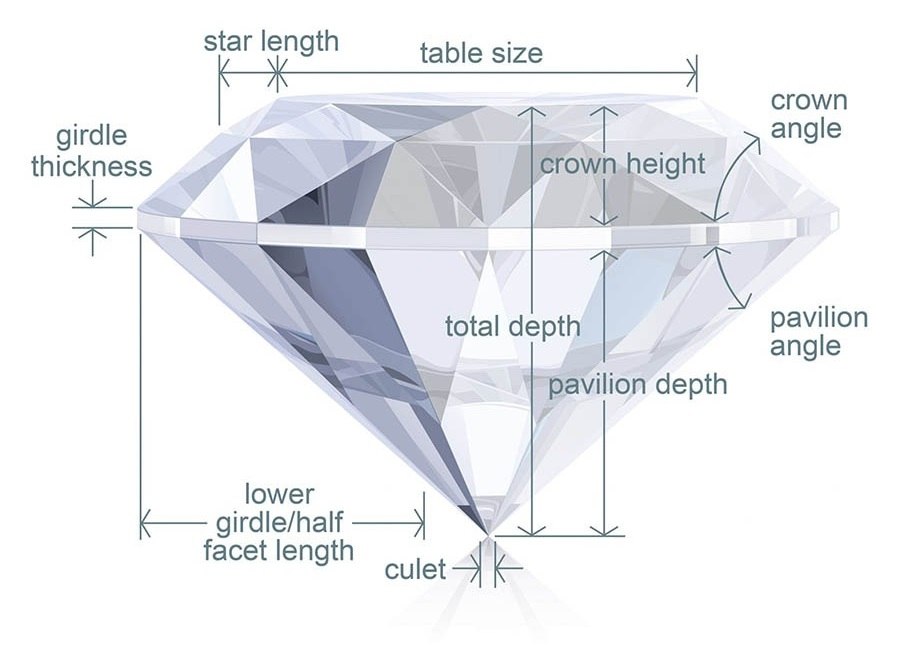


# **Reading Data**


In [80]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import sklearn

In [81]:
# configuring visualizations
%matplotlib inline
mp.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)


In [82]:
train = pd.read_csv("train.csv")

In [83]:
test = pd.read_csv("test.csv")

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [85]:
train.describe()

Id         carat         depth         table         price  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean   21576.500000      0.797855     61.747177     57.458347   3929.491912   
std    12457.053745      0.473594      1.435454      2.233904   3985.527795   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    10788.750000      0.400000     61.000000     56.000000    947.750000   
50%    21576.500000      0.700000     61.800000     57.000000   2401.000000   
75%    32364.250000      1.040000     62.500000     59.000000   5312.000000   
max    43152.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  43152.000000  43152.000000  43152.000000  
mean       5.731568      5.735018      3.538568  
std        1.121279      1.148809      0.708238  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [86]:
train.shape

(43152, 11)

In [87]:
train.head()

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [88]:
train.tail()

Id  carat        cut color clarity  depth  table  price     x     y  \
43147  43148   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18   
43148  43149   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73   
43149  43150   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87   
43150  43151   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43   
43151  43152   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46   

          z  
43147  3.18  
43148  3.55  
43149  3.02  
43150  2.65  
43151  2.74

### **Drop the 'ID' column as we already have Index**

In [89]:
train = train.drop(["Id"],axis=1)
train.head()

carat      cut color clarity  depth  table  price     x     y     z
0   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

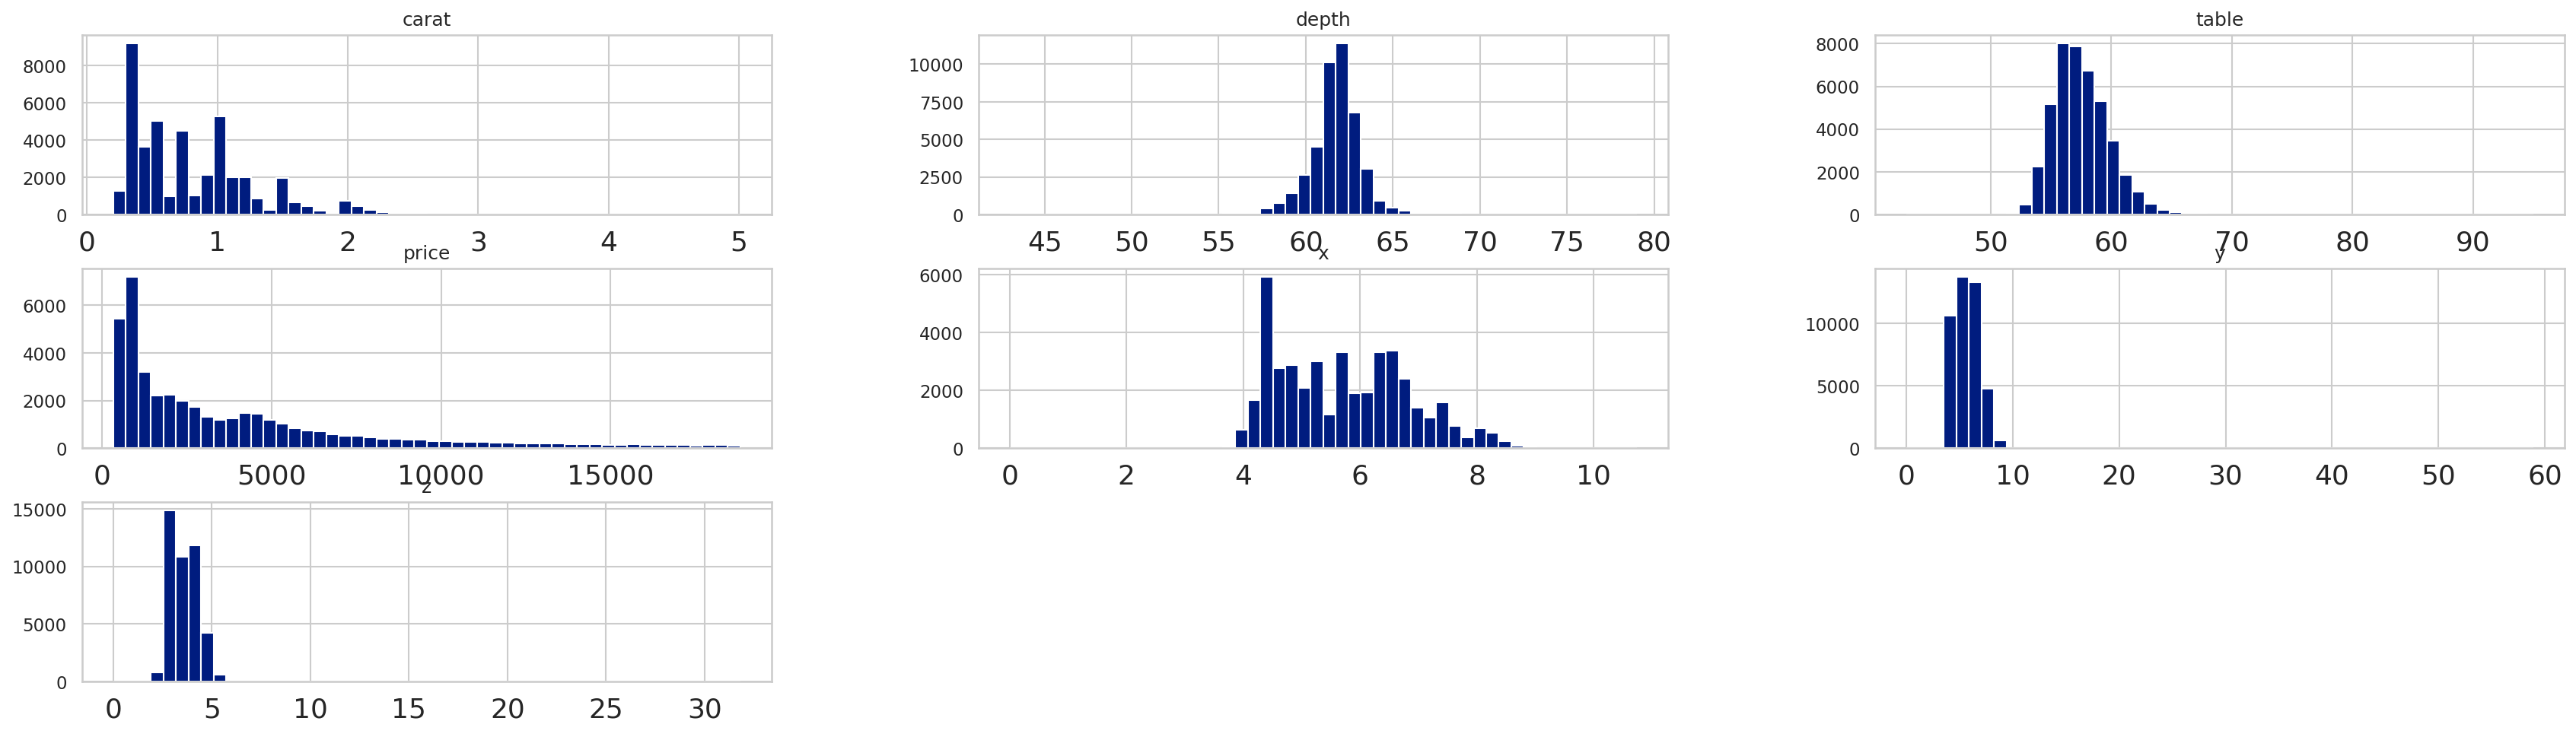

In [90]:
train.hist(bins= 50)

In [91]:
# Scatter plot to display the correlation between the price and carat
fig = px.scatter(x=train['price'], y=train['carat'])
fig.show()

<ipython-input-92-06af5cd629c2>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

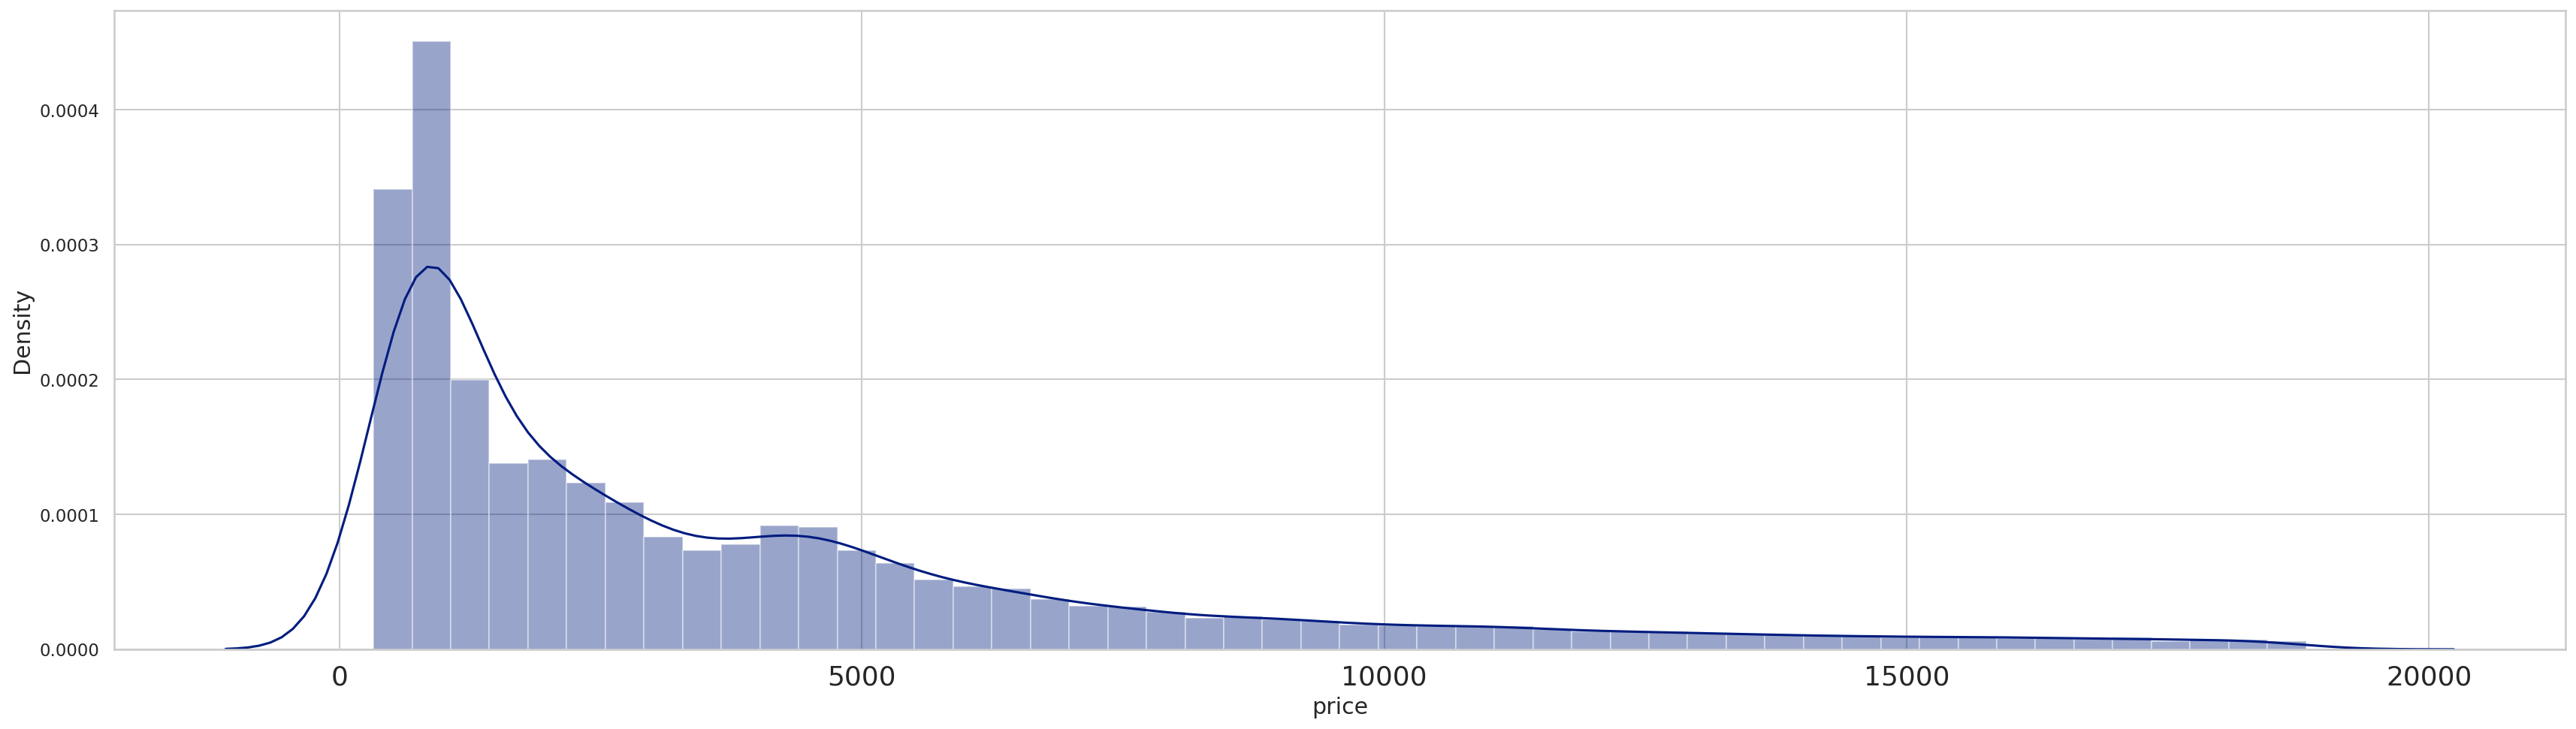

In [92]:
sns.distplot(train.price)

# **Intial Data Preparation**


In [93]:
dtypes = pd.DataFrame(train.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=train.nunique()

dtypes["Null Values"]=train.isnull().sum()

dtypes["% null Values"]=train.isnull().sum()/len(train)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

- **No missing values will be bothering us in our data.**


In [94]:
train.duplicated().sum()

97

> **Dropping Duplicates**


In [95]:
train.drop_duplicates(inplace=True)

<ipython-input-96-8e0163f78160>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

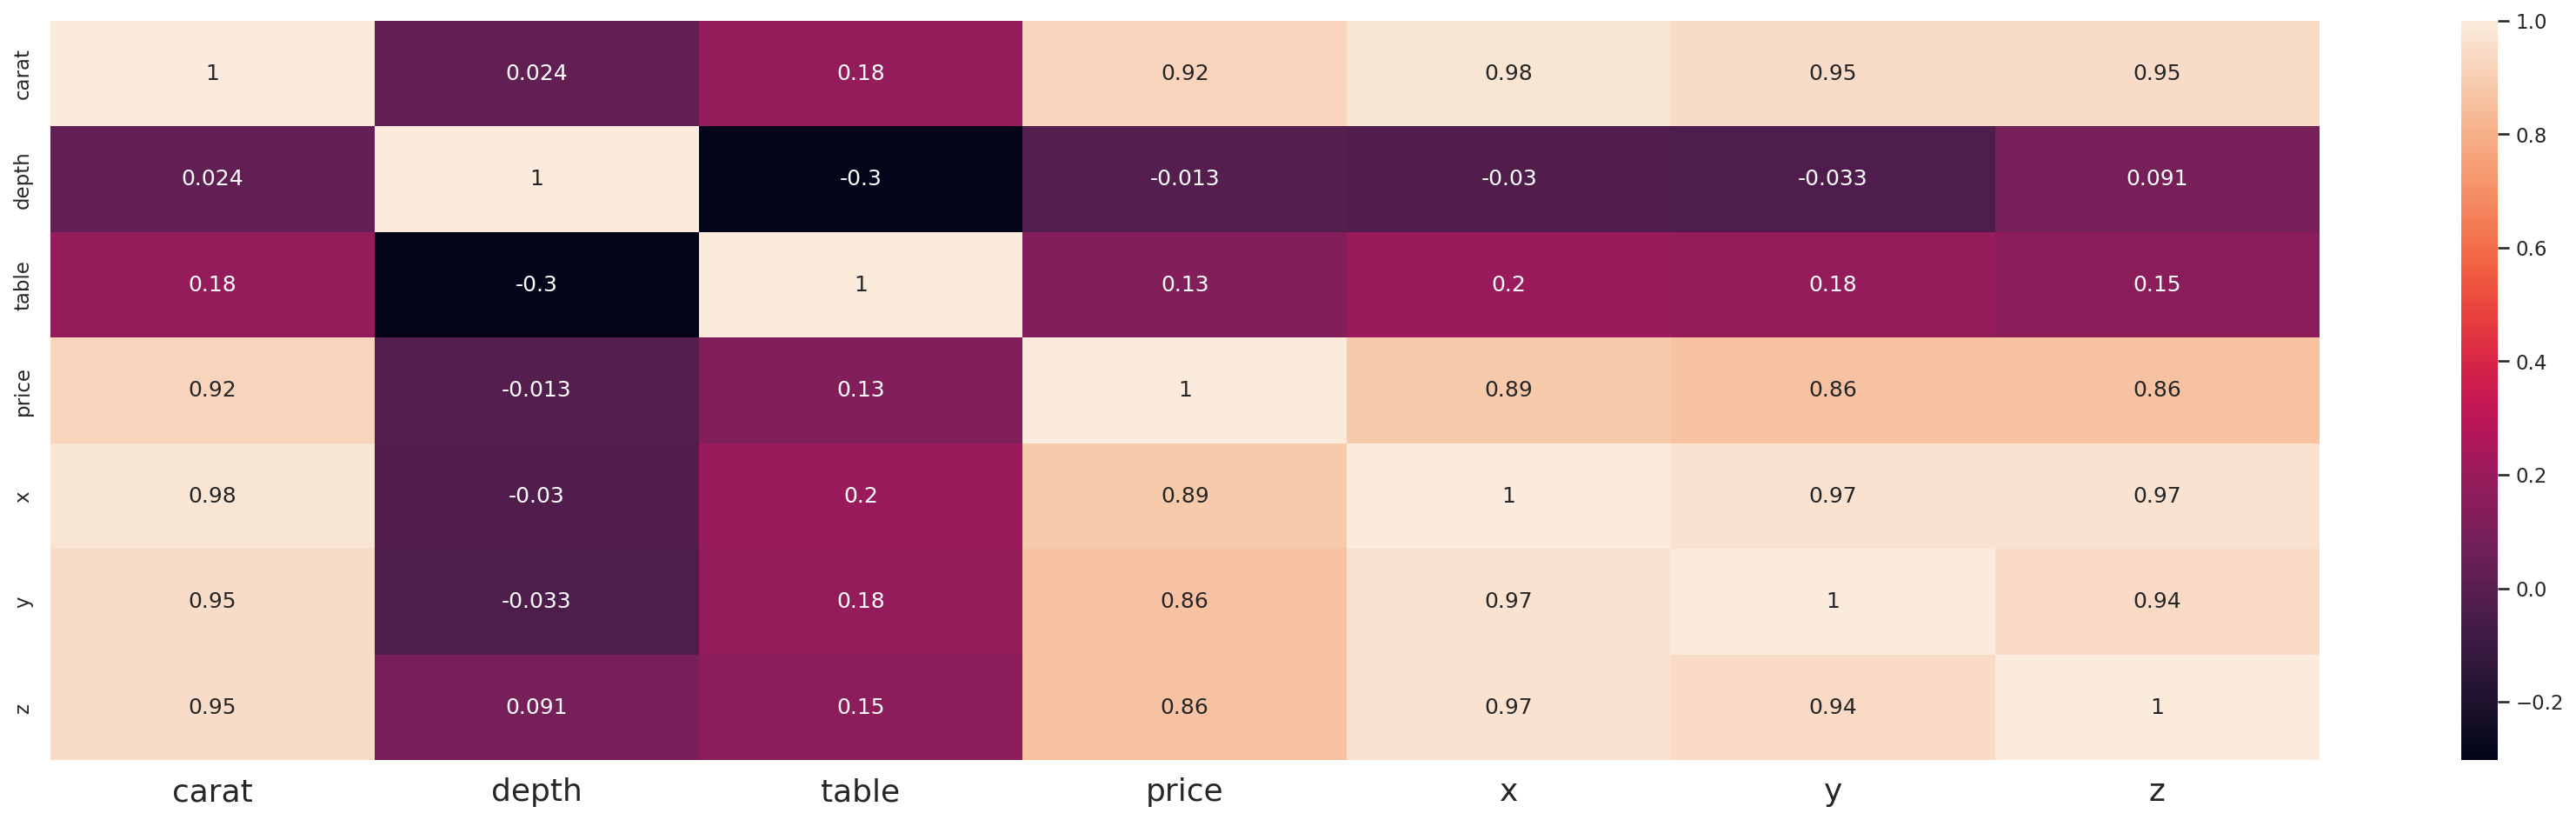

In [96]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True)

### **Observations:**

*   Depth is inversely related to Price.
*   The Price of the Diamond is highly correlated to Carat, and its Dimensions.
*   The Weight (Carat) of a diamond has the most significant impact on its Price.
*   The Length(x) , Width(y) and Height(z) seems to be higly related to 
 Price and even each other.
*   Self Relation of a feature to itself is 1 as expected.



In [97]:
# Making a scatter matrix for further analysis
df = train
fig = px.scatter_matrix(df, dimensions=["carat", "depth", "price"])
fig.show()

<Axes: xlabel='cut', ylabel='price'>

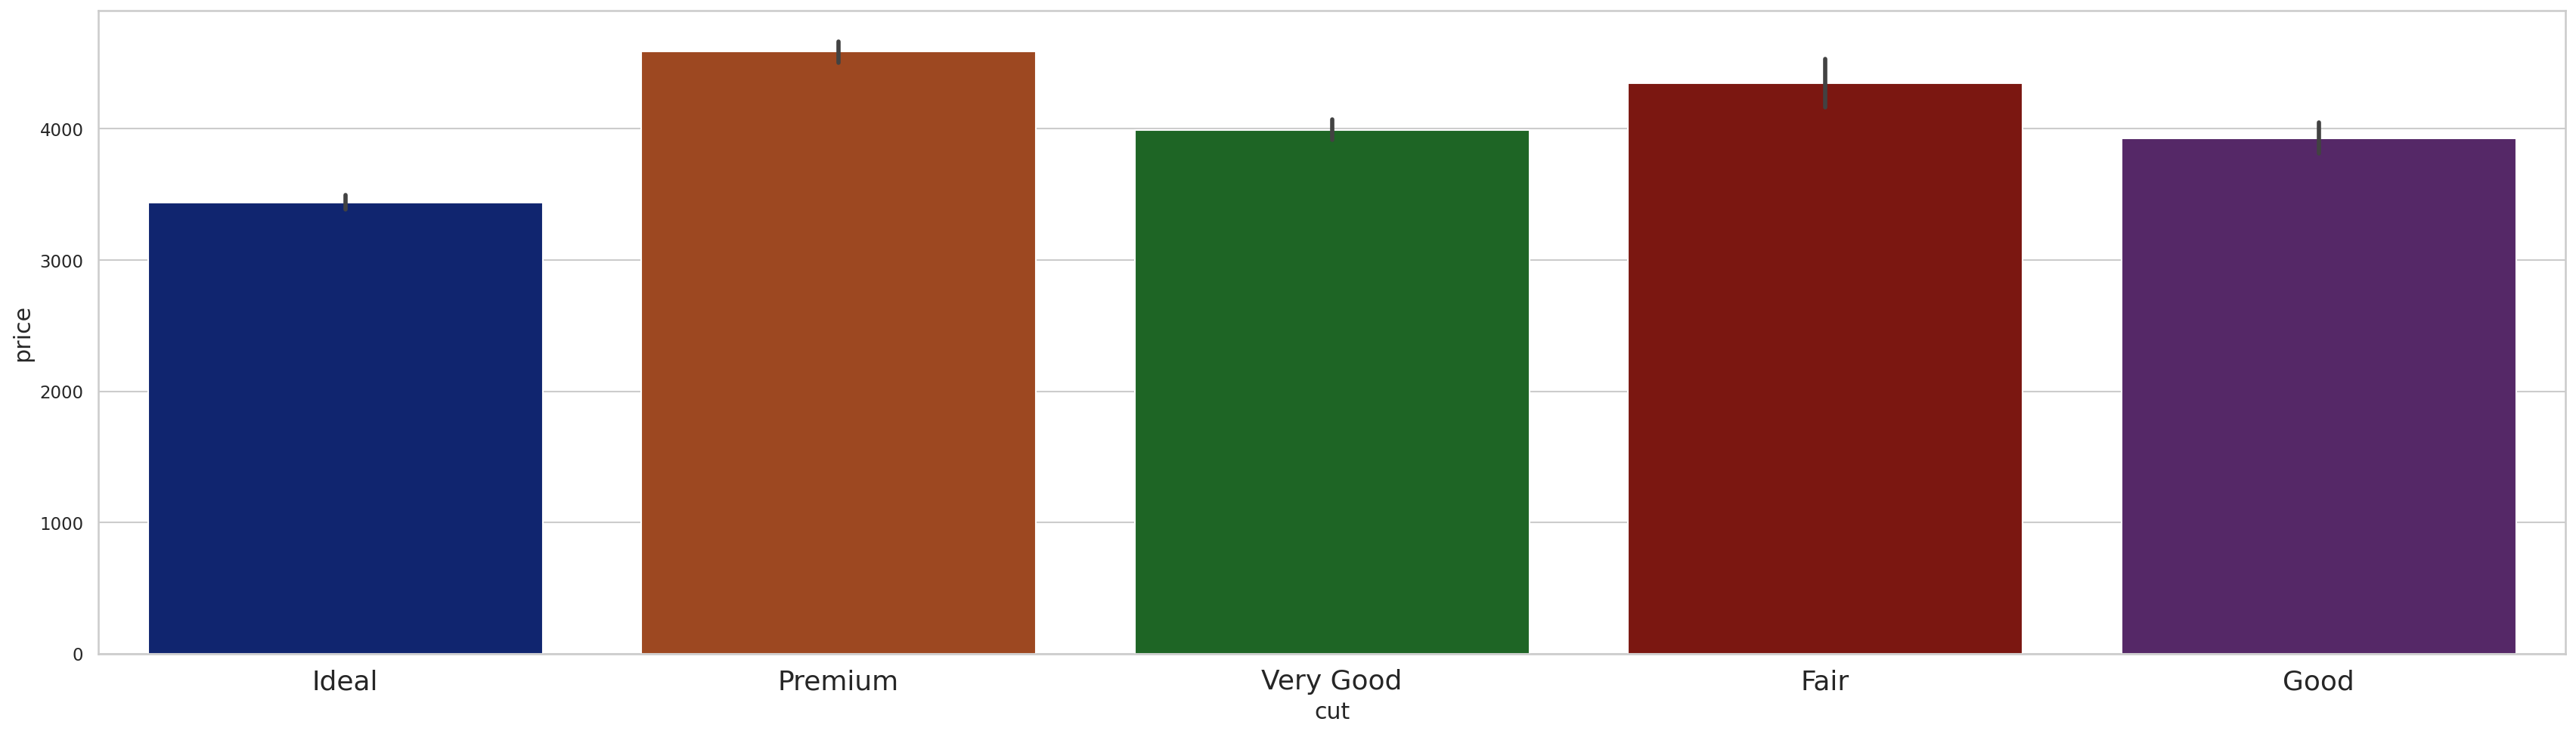

In [98]:
sns.barplot(x='cut', y = 'price', data=train)

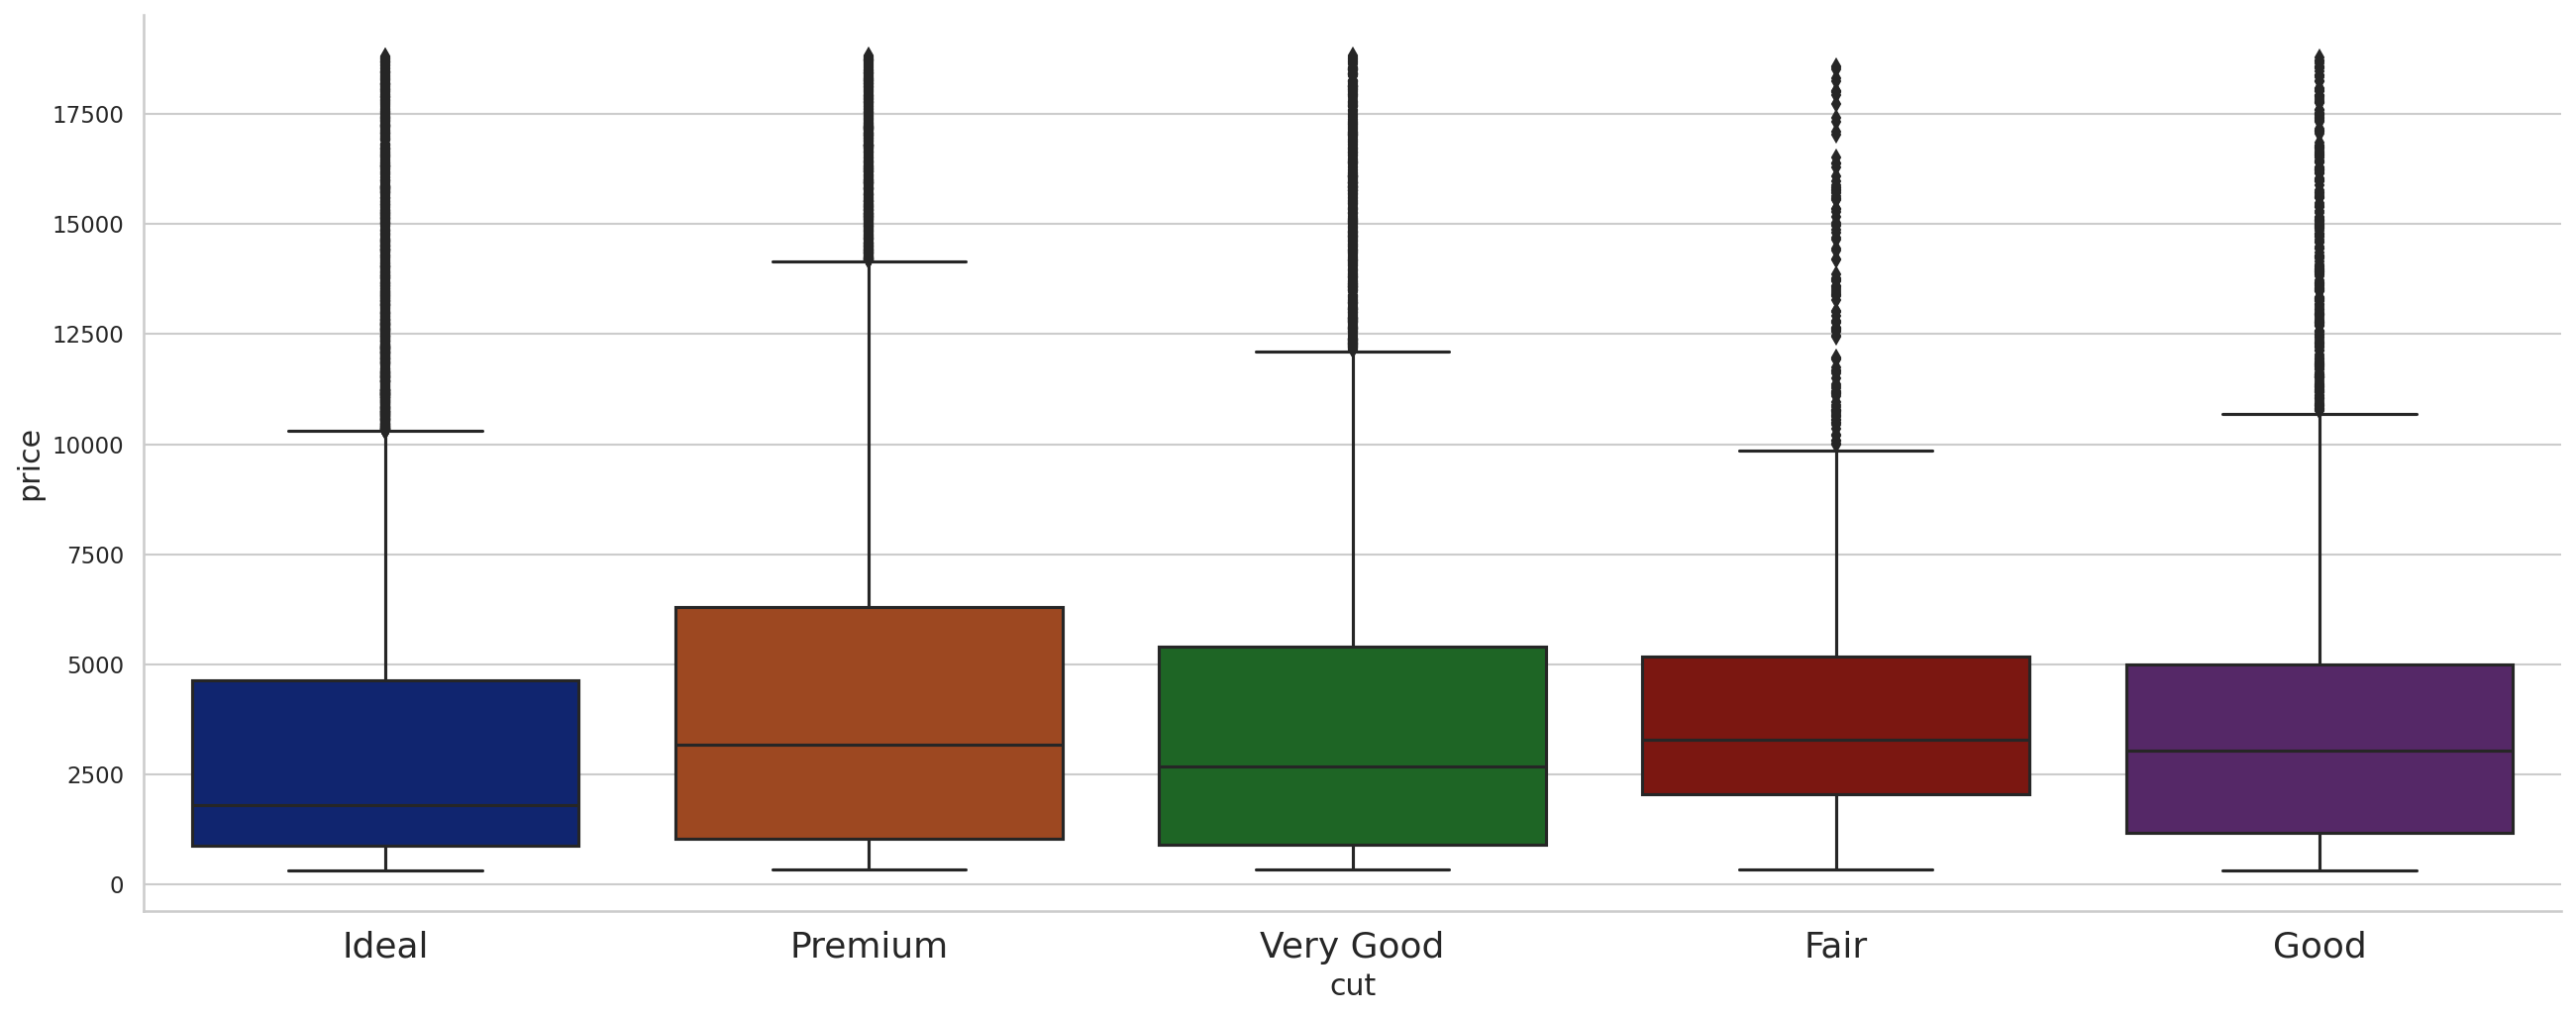

In [99]:
sns.catplot(x='cut', y='price', data=train, kind='box', height=7, aspect=2.5)

<Axes: xlabel='color', ylabel='price'>

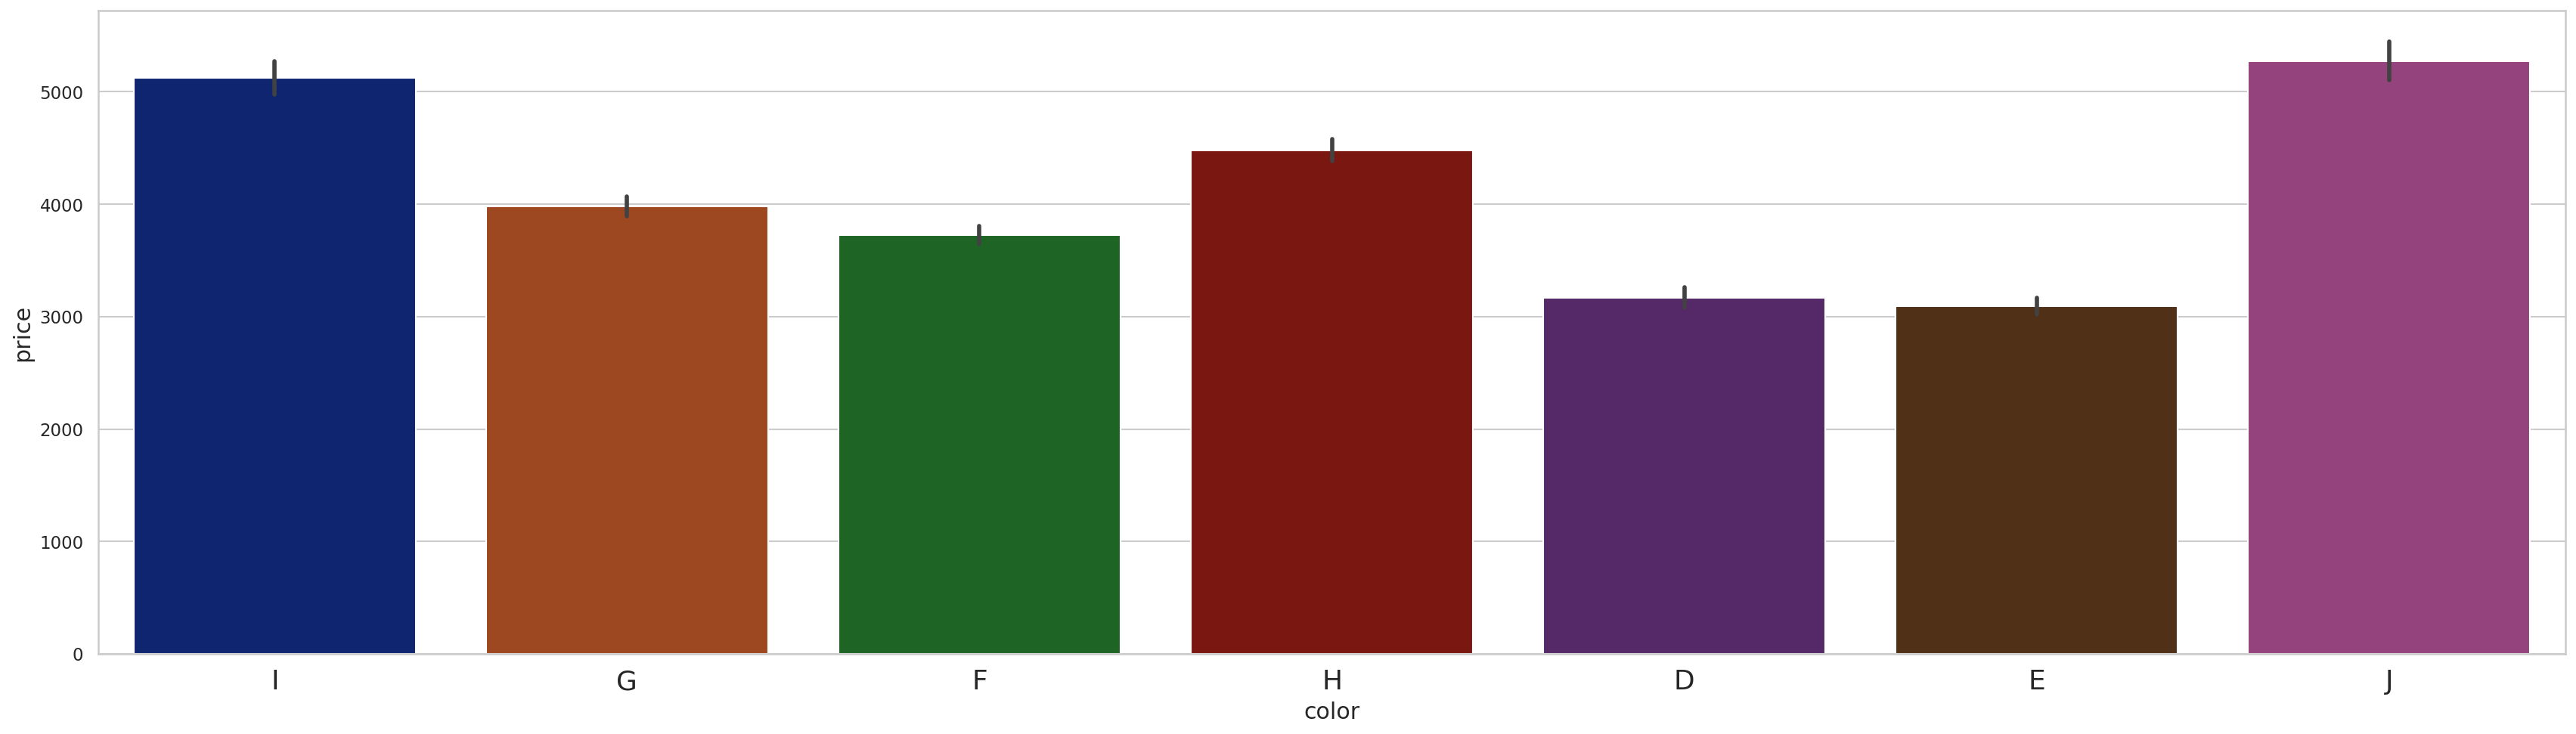

In [100]:
sns.barplot(x='color', y = 'price', data=train)

<Axes: xlabel='clarity', ylabel='price'>

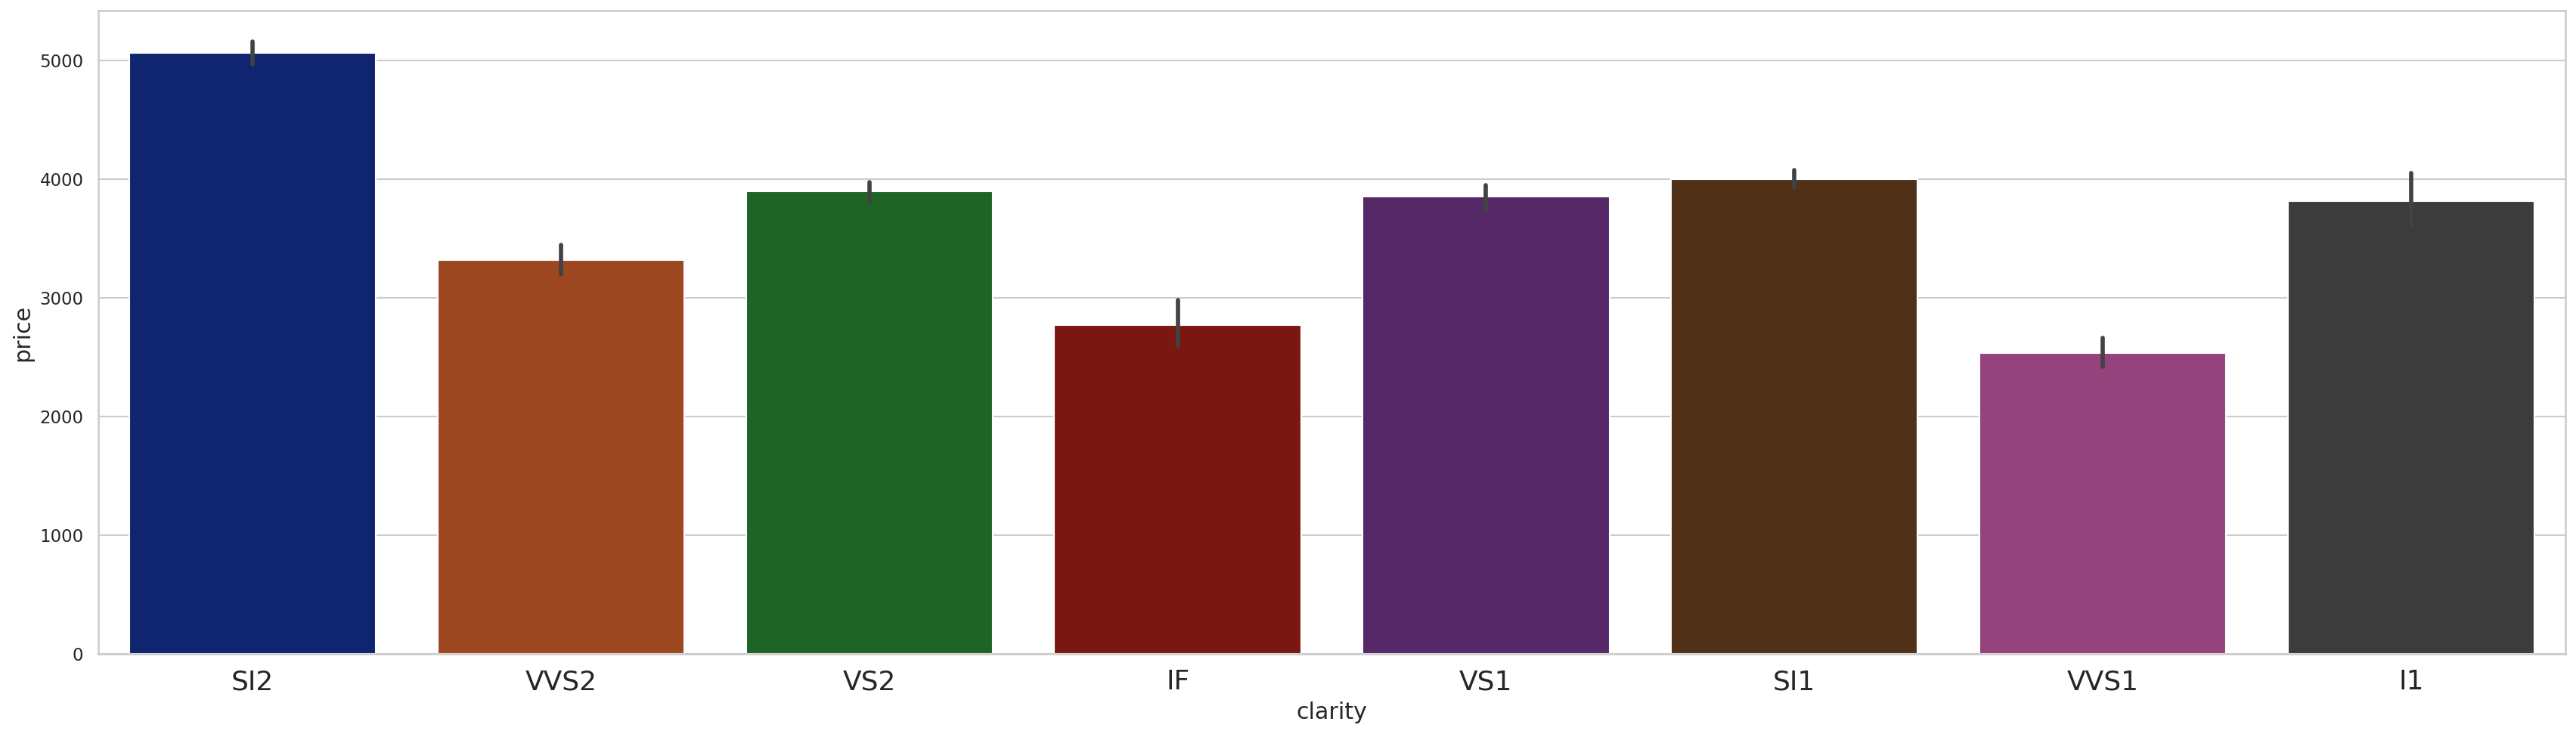

In [101]:
sns.barplot(x='clarity', y = 'price', data=train)

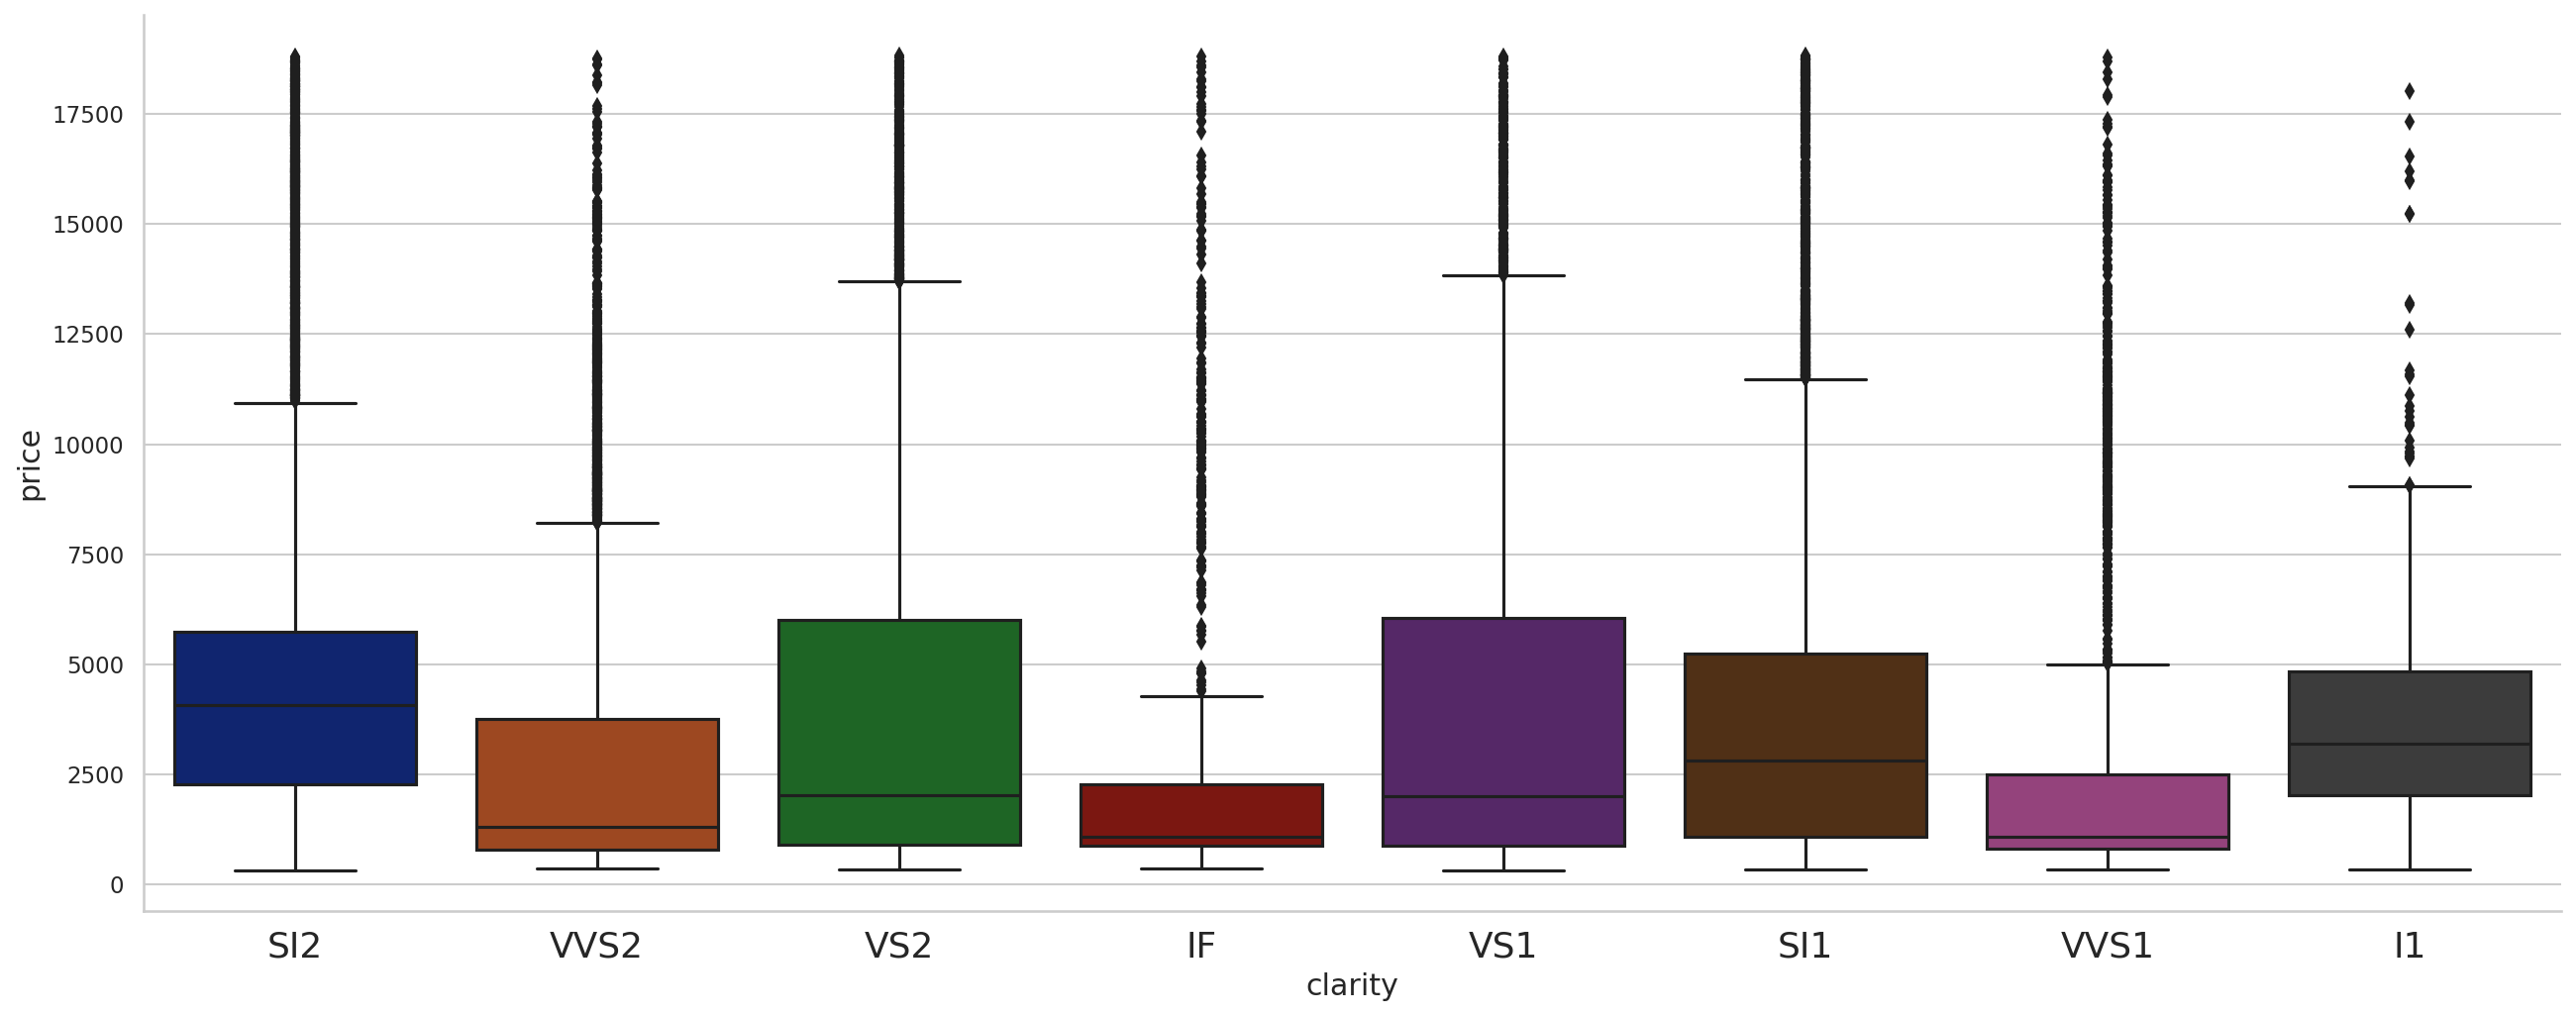

In [102]:
sns.catplot(x='clarity', y='price', data=train, kind='box', height=7, aspect=2.5)

# **Drop faulty data**

We've noticed that some X , Y and Z rows contain value O which don't make any sense to have either of Length or Width or Height to be zero, so we'll drop them

In [103]:
train.loc[(train['x']==0) | (train['y']==0) | (train['z']==0)]

carat        cut color clarity  depth  table  price     x     y    z
571     1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
903     2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
1221    1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
4980    1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
6765    0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
11221   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
13727   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
14265   1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
16971   1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
21061   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
22171   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
24901   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27221   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0
34065   1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
35347   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
39201   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
42898   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0

In [104]:
len(train[(train['x']==0) | (train['y']==0) | (train['z']==0)])

17

In [105]:
train = train[(train[['x','y','z']] != 0).all(axis=1)]

In [106]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [107]:
train.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth%', 'z':'depth','table':'table_width'}, inplace=True)

train

<ipython-input-107-379b29060a75>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



carat        cut color clarity  depth%  table_width  price  length  \
0       1.06      Ideal     I     SI2    61.8         57.0   4270    6.57   
1       1.51    Premium     G    VVS2    60.9         58.0  15164    7.38   
2       0.32      Ideal     F     VS2    61.3         56.0    828    4.43   
3       0.53      Ideal     G     VS2    61.2         56.0   1577    5.19   
4       0.70    Premium     H    VVS2    61.0         57.0   2596    5.76   
...      ...        ...   ...     ...     ...          ...    ...     ...   
43147   0.52      Ideal     E     VS2    61.5         56.0   1760    5.16   
43148   0.72  Very Good     D     VS2    62.1         59.0   3016    5.70   
43149   0.44    Premium     I    VVS1    61.5         58.0    990    4.95   
43150   0.31    Premium     E     VS1    60.2         58.0    734    4.38   
43151   0.33      Ideal     G     VS2    61.2         55.0    743    4.49   

       width  depth  
0       6.60   4.07  
1       7.42   4.51  
2       4.41   2.71  
3       5.22   3.19  
4       5.72   3.50  
...      ...    ...  
43147   5.18   3.18  
43148   5.73   3.55  
43149   4.87   3.02  
43150   4.43   2.65  
43151   4.46   2.74  

[43038 rows x 10 columns]

## **Fixing Categorical Columns**


In [108]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']


train['cut'] = pd.Categorical(df['cut'], categories= cut_categories, ordered=True)


train['cut']

<ipython-input-108-0e3002e9345d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0            Ideal
1          Premium
2            Ideal
3            Ideal
4          Premium
           ...    
43147        Ideal
43148    Very Good
43149      Premium
43150      Premium
43151        Ideal
Name: cut, Length: 43038, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [109]:
color_categories = sorted(train['color'].value_counts().index, reverse=True)

train['color'] = pd.Categorical(df['color'], categories= color_categories, ordered=True)

train['color']

<ipython-input-109-c1d766d67890>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        I
1        G
2        F
3        G
4        H
        ..
43147    E
43148    D
43149    I
43150    E
43151    G
Name: color, Length: 43038, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [110]:
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

train['clarity'] = pd.Categorical(train['clarity'], categories= clarity_categories, ordered=True)

train['clarity']

<ipython-input-110-c506aa452b5b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         SI2
1        VVS2
2         VS2
3         VS2
4        VVS2
         ... 
43147     VS2
43148     VS2
43149    VVS1
43150     VS1
43151     VS2
Name: clarity, Length: 43038, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

**Let's make new encoded features from our categories**


In [111]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ['cut','color','clarity']

cat_orders = [cut_categories, color_categories, clarity_categories]

encoder = OrdinalEncoder(categories=cat_orders)

cats_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns = ['cut_encoded','color_encoded','clarity_encoded'])

cats_encoded

cut_encoded  color_encoded  clarity_encoded
0              4.0            1.0              1.0
1              3.0            3.0              5.0
2              4.0            4.0              3.0
3              4.0            3.0              3.0
4              3.0            2.0              5.0
...            ...            ...              ...
43033          4.0            5.0              3.0
43034          2.0            6.0              3.0
43035          3.0            1.0              6.0
43036          3.0            5.0              4.0
43037          4.0            3.0              3.0

[43038 rows x 3 columns]

In [112]:
df_encoded = df.drop(columns=['cut','color','clarity']).copy()

df_encoded['cut']=df['cut'].astype('category')
df_encoded['color']=df['color'].astype('category')
df_encoded['clarity']=df['clarity'].astype('category')

df_encoded['cut_encoded'] = df_encoded['cut'].cat.codes
df_encoded['color_encoded'] = df_encoded['color'].cat.codes
df_encoded['clarity_encoded'] = df_encoded['clarity'].cat.codes

In [113]:
print(df_encoded['cut_encoded'].value_counts(), '\n')
print(cats_encoded['cut_encoded'].value_counts(), '\n')
print(df['cut'].value_counts(), '\n')

2    17159
3    11070
4     9650
1     3871
0     1288
Name: cut_encoded, dtype: int64 

4.0    17159
3.0    11070
2.0     9650
1.0     3871
0.0     1288
Name: cut_encoded, dtype: int64 

Ideal        17159
Premium      11070
Very Good     9650
Good          3871
Fair          1288
Name: cut, dtype: int64 



In [114]:
print(df_encoded['color_encoded'].value_counts(), '\n')
print(cats_encoded['color_encoded'].value_counts(), '\n')
print(df['color'].value_counts(), '\n')

3    9035
1    7817
2    7613
4    6623
0    5411
5    4253
6    2286
Name: color_encoded, dtype: int64 

3.0    9035
5.0    7817
4.0    7613
2.0    6623
6.0    5411
1.0    4253
0.0    2286
Name: color_encoded, dtype: int64 

G    9035
E    7817
F    7613
H    6623
D    5411
I    4253
J    2286
Name: color, dtype: int64 



In [115]:
print(df_encoded['clarity_encoded'].value_counts(), '\n')
print(cats_encoded['clarity_encoded'].value_counts(), '\n')
print(df['clarity'].value_counts(), '\n')

2    10404
5     9803
3     7395
4     6464
7     4031
6     2899
1     1440
0      602
Name: clarity_encoded, dtype: int64 

2.0    10404
3.0     9803
1.0     7395
4.0     6464
5.0     4031
6.0     2899
7.0     1440
0.0      602
Name: clarity_encoded, dtype: int64 

SI1     10404
VS2      9803
SI2      7395
VS1      6464
VVS2     4031
VVS1     2899
IF       1440
I1        602
Name: clarity, dtype: int64 



- **We can notice that the `OrdinalEncoder` did the same job as `.cat.codes` function, this will help us makeing the piplines.**


## **Creating New Volume Feature**


- **We will make a `Volume` Feature which is the product of `width * lenght * depth `**


In [117]:
df['volume'] = df['z'] * df['y'] * df['z']

df

<ipython-input-117-49b88961bad6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



carat        cut color clarity  depth  table  price     x     y     z  \
0       1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07   
1       1.51    Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51   
2       0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71   
3       0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19   
4       0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
43147   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18  3.18   
43148   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73  3.55   
43149   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87  3.02   
43150   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43  2.65   
43151   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46  2.74   

           volume  
0      109.328340  
1      150.923542  
2       32.387481  
3       53.119242  
4       70.070000  
...           ...  
43147   52.382232  
43148   72.212325  
43149   44.416348  
43150   31.109675  
43151   33.483896  

[43038 rows x 11 columns]

In [118]:
df_encoded['volume'] = df['volume']

df_encoded

carat  depth  table  price     x     y     z        cut color clarity  \
0       1.06   61.8   57.0   4270  6.57  6.60  4.07      Ideal     I     SI2   
1       1.51   60.9   58.0  15164  7.38  7.42  4.51    Premium     G    VVS2   
2       0.32   61.3   56.0    828  4.43  4.41  2.71      Ideal     F     VS2   
3       0.53   61.2   56.0   1577  5.19  5.22  3.19      Ideal     G     VS2   
4       0.70   61.0   57.0   2596  5.76  5.72  3.50    Premium     H    VVS2   
...      ...    ...    ...    ...   ...   ...   ...        ...   ...     ...   
43147   0.52   61.5   56.0   1760  5.16  5.18  3.18      Ideal     E     VS2   
43148   0.72   62.1   59.0   3016  5.70  5.73  3.55  Very Good     D     VS2   
43149   0.44   61.5   58.0    990  4.95  4.87  3.02    Premium     I    VVS1   
43150   0.31   60.2   58.0    734  4.38  4.43  2.65    Premium     E     VS1   
43151   0.33   61.2   55.0    743  4.49  4.46  2.74      Ideal     G     VS2   

       cut_encoded  color_encoded  clarity_encoded      volume  
0                2              5                3  109.328340  
1                3              3                7  150.923542  
2                2              2                5   32.387481  
3                2              3                5   53.119242  
4                3              4                7   70.070000  
...            ...            ...              ...         ...  
43147            2              1                5   52.382232  
43148            4              0                5   72.212325  
43149            3              5                6   44.416348  
43150            3              1                4   31.109675  
43151            2              3                5   33.483896  

[43038 rows x 14 columns]

In [119]:
df.describe().T

count         mean          std         min       25%          50%  \
carat   43038.0     0.797475     0.472928    0.200000    0.4000     0.700000   
depth   43038.0    61.746582     1.434702   43.000000   61.0000    61.800000   
table   43038.0    57.459375     2.233822   43.000000   56.0000    57.000000   
price   43038.0  3928.189112  3982.731057  326.000000  948.0000  2401.000000   
x       43038.0     5.731744     1.118784    3.730000    4.7100     5.700000   
y       43038.0     5.735116     1.146848    3.680000    4.7200     5.710000   
z       43038.0     3.539926     0.704559    1.070000    2.9100     3.530000   
volume  43038.0    80.355902    56.318121    7.636483   40.1998    71.120416   

                75%        max  
carat      1.040000      5.010  
depth     62.500000     79.000  
table     59.000000     95.000  
price   5311.750000  18823.000  
x          6.540000     10.740  
y          6.540000     58.900  
z          4.040000     31.800  
volume   105.403441   5207.886

# **Exploratory Data Analysis**


## **Univariate Analysis**


**Let's Check the Distributions of Our Features**


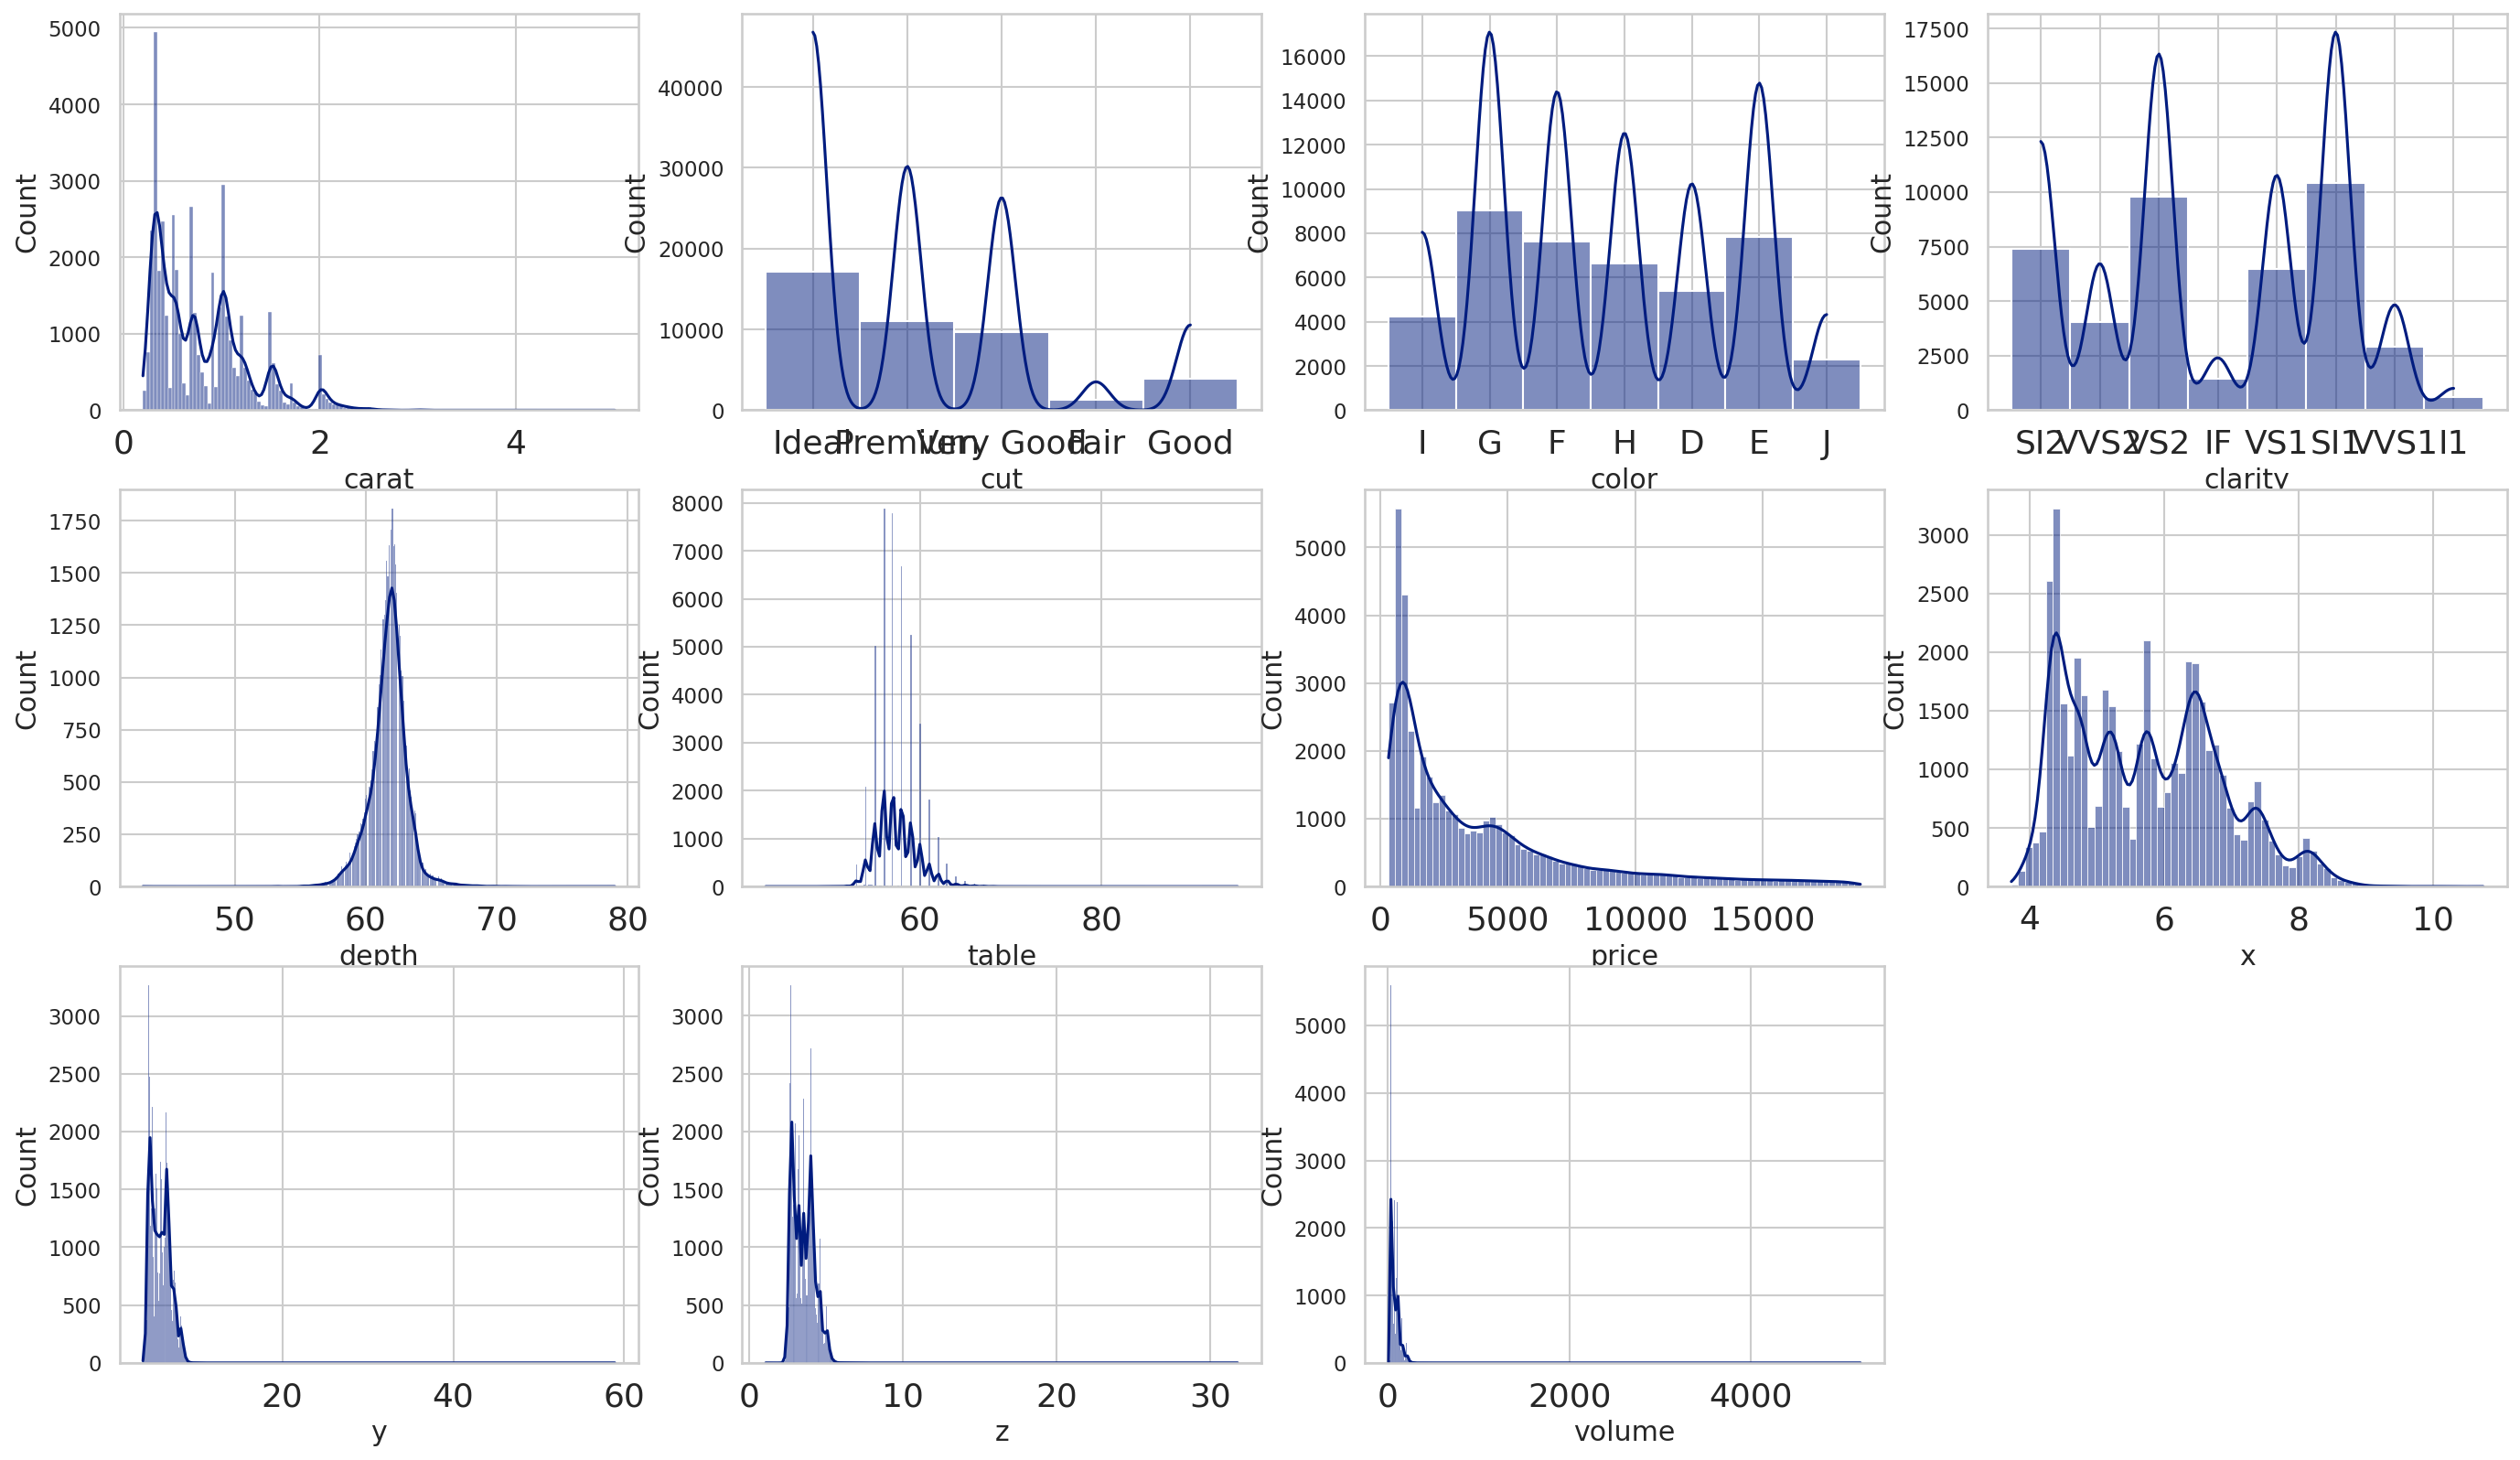

In [120]:
plt.figure(figsize=(20,25))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 4, i+1)

        sns.histplot(df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

- **We may want to look at outliers in the `['width','depth','table_width','depth%','volume']` features by removing or imputing them.**


## **Multivariate Analysis**


**Now Let's look at the Correlation of the Features**


<Axes: >

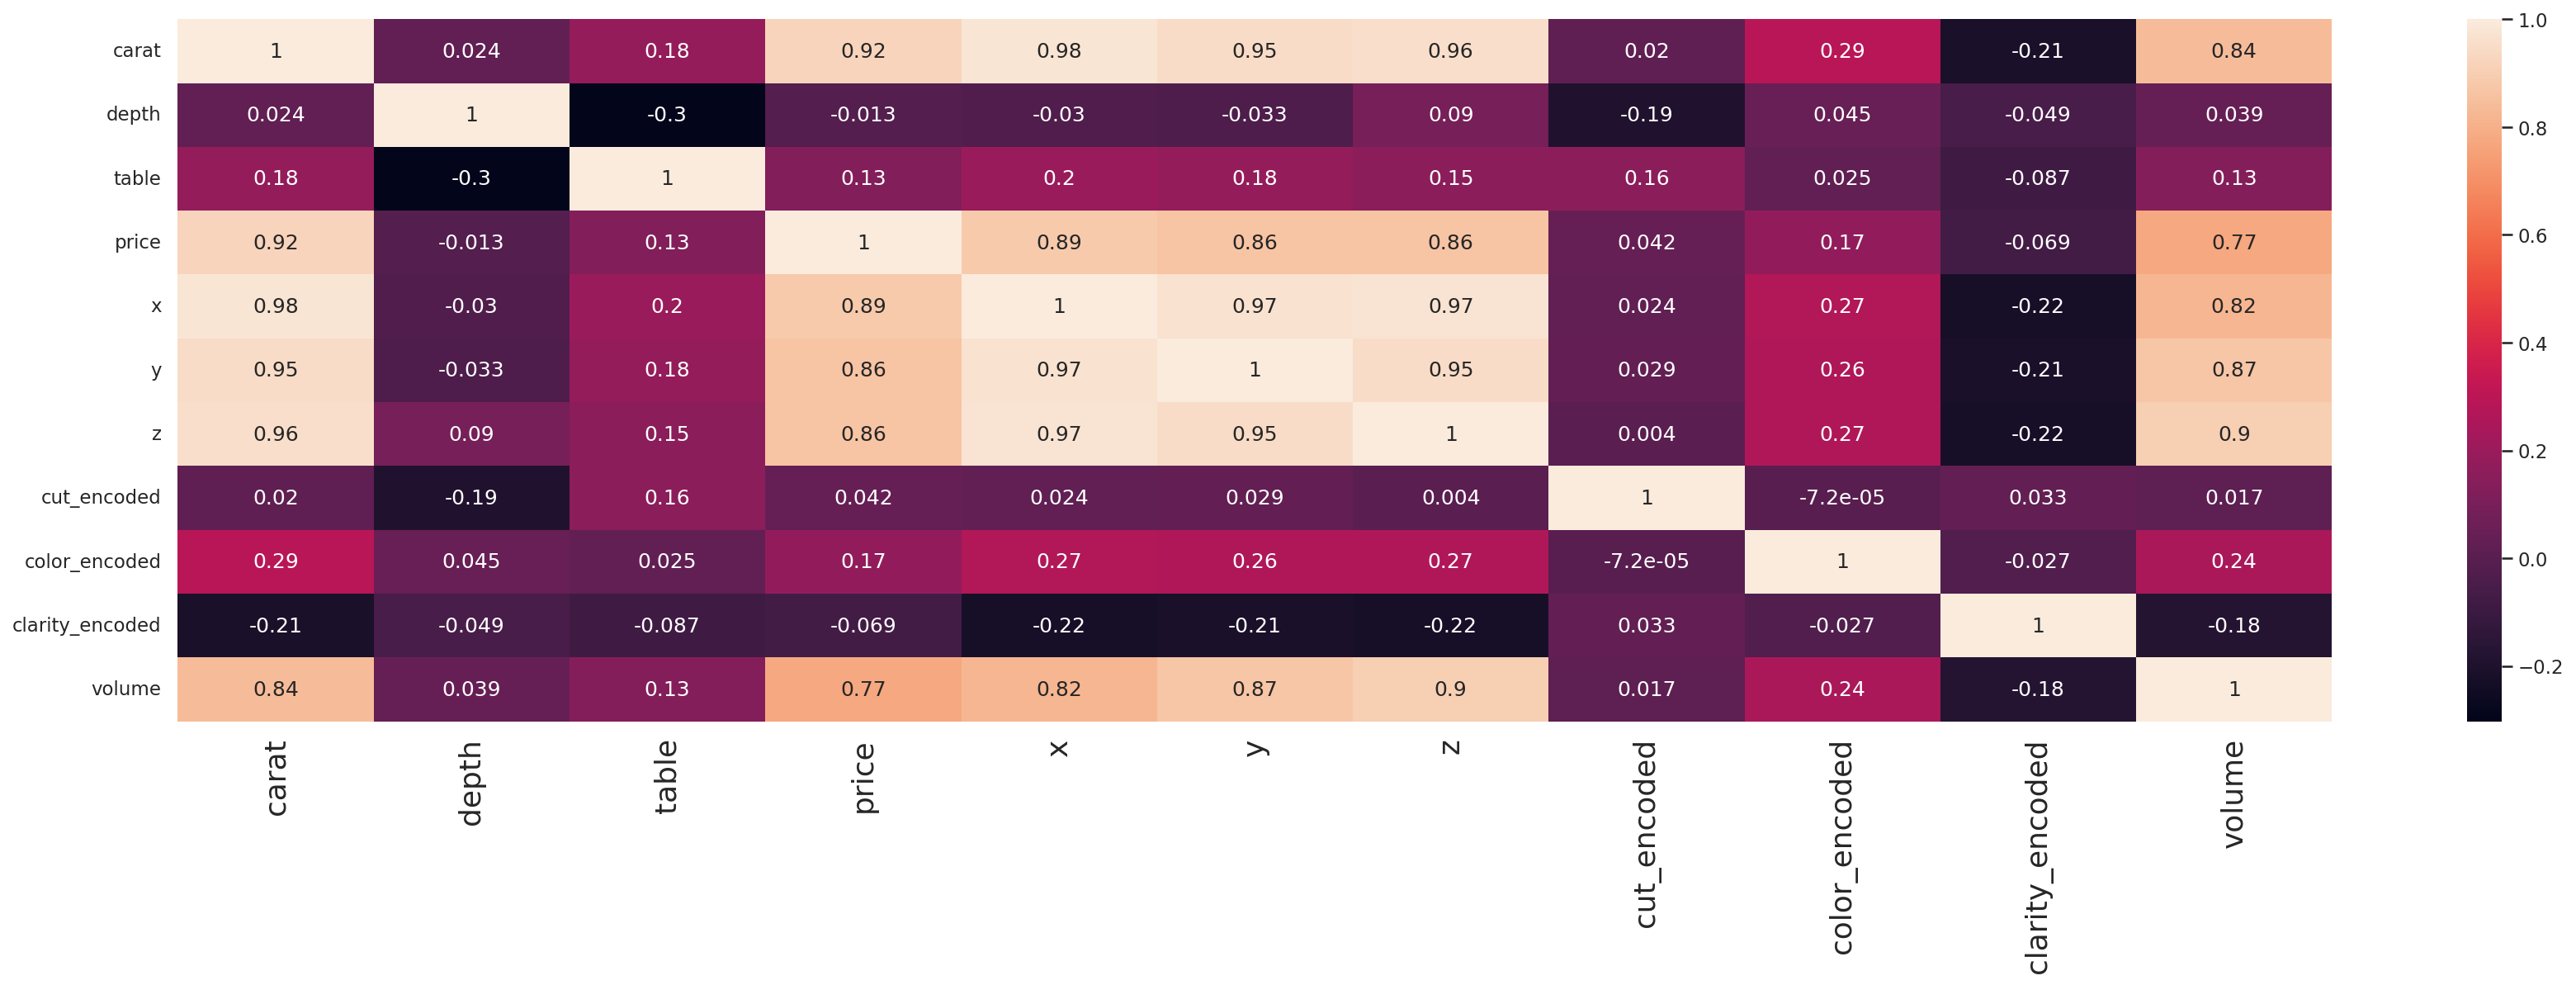

In [121]:
plt.figure()
sns.heatmap( df_encoded.corr(numeric_only=True), annot=True)

<Axes: >

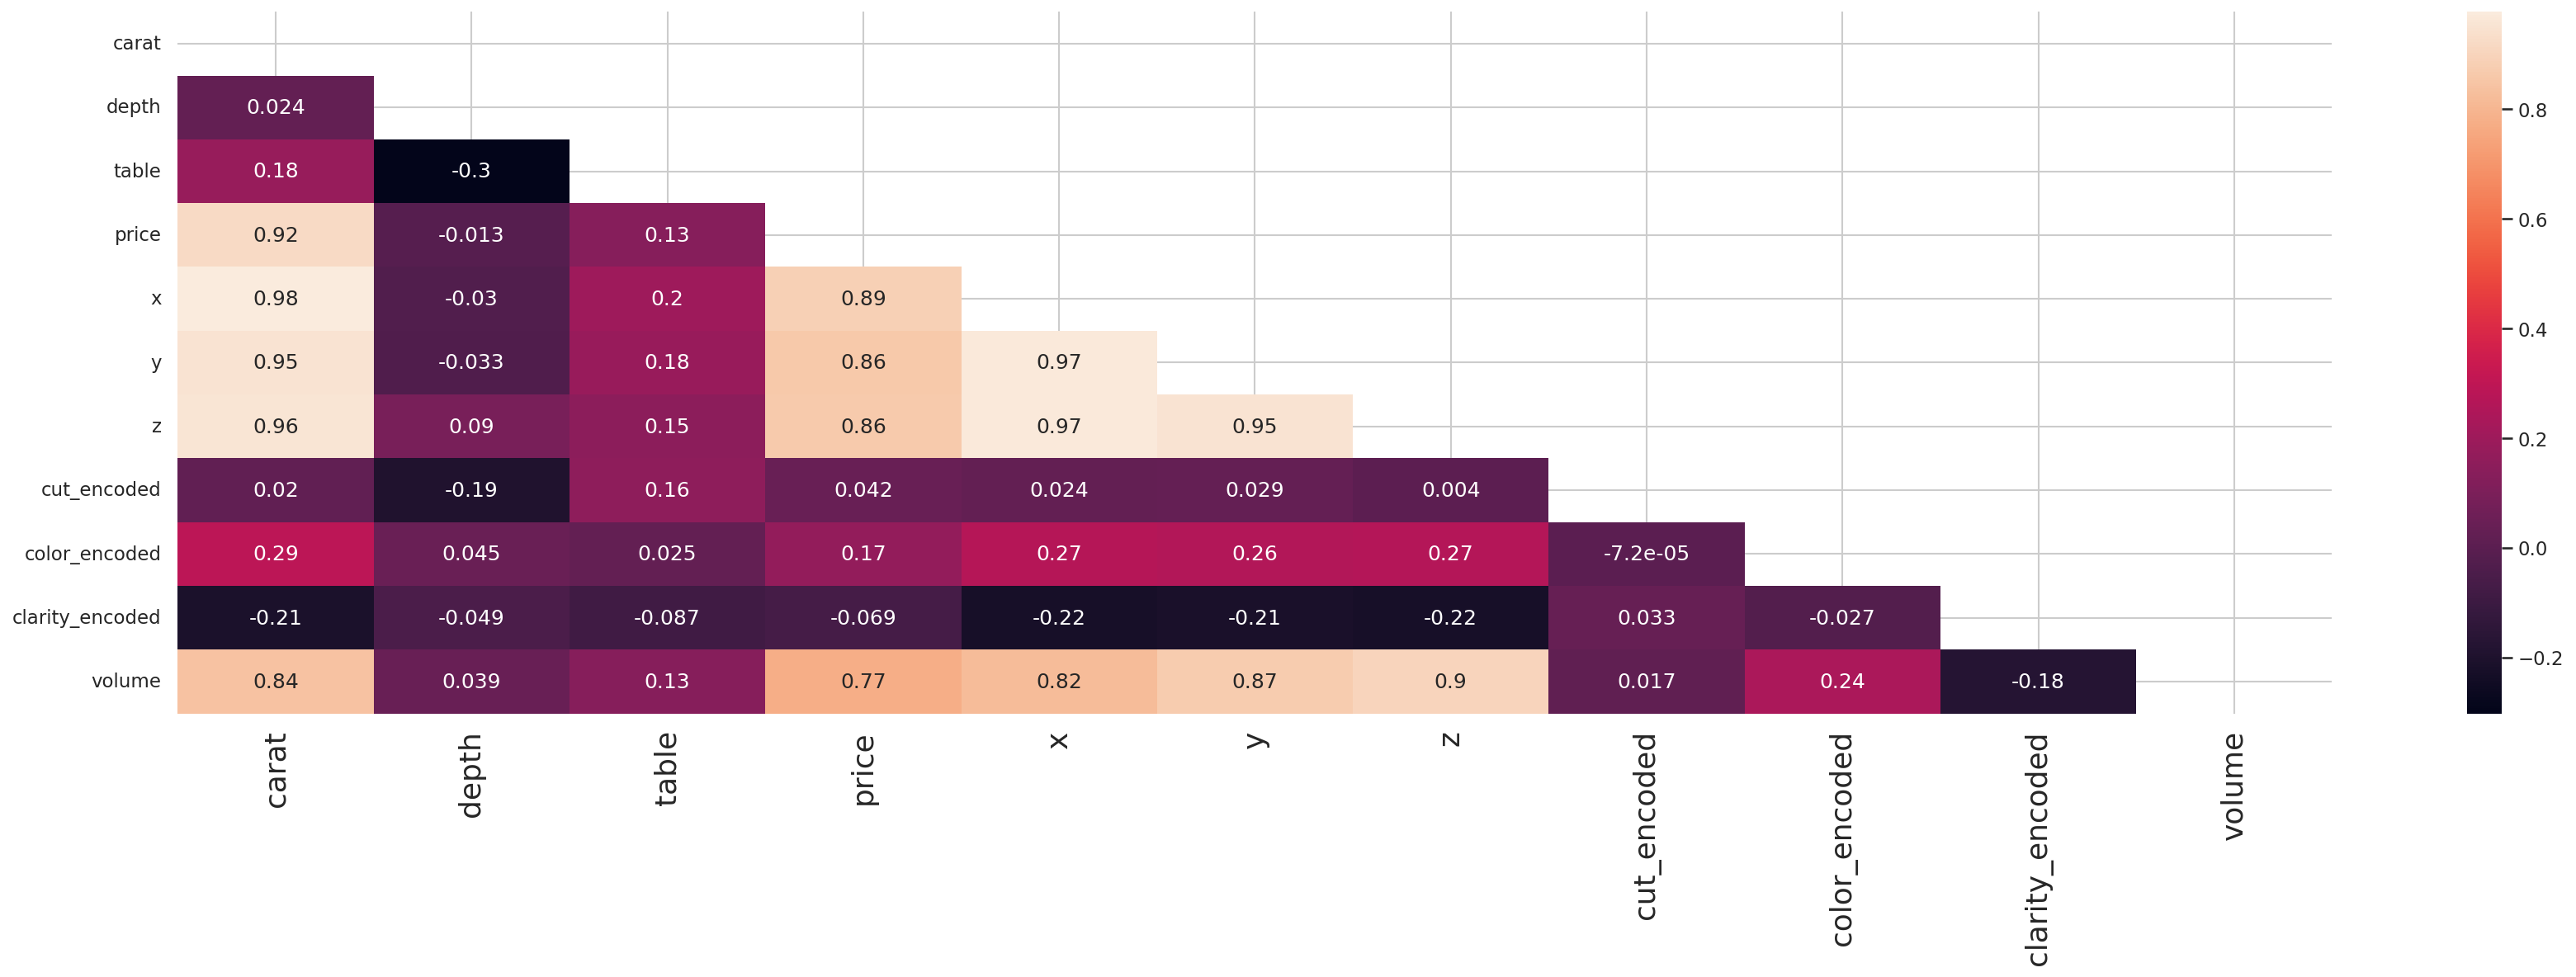

In [122]:
plt.figure()
mask = np.triu(np.ones_like(df_encoded.corr(numeric_only=True), dtype=bool))
sns.heatmap( df_encoded.corr(numeric_only=True), annot=True, mask=mask)

<Figure size 3750x1050 with 0 Axes>

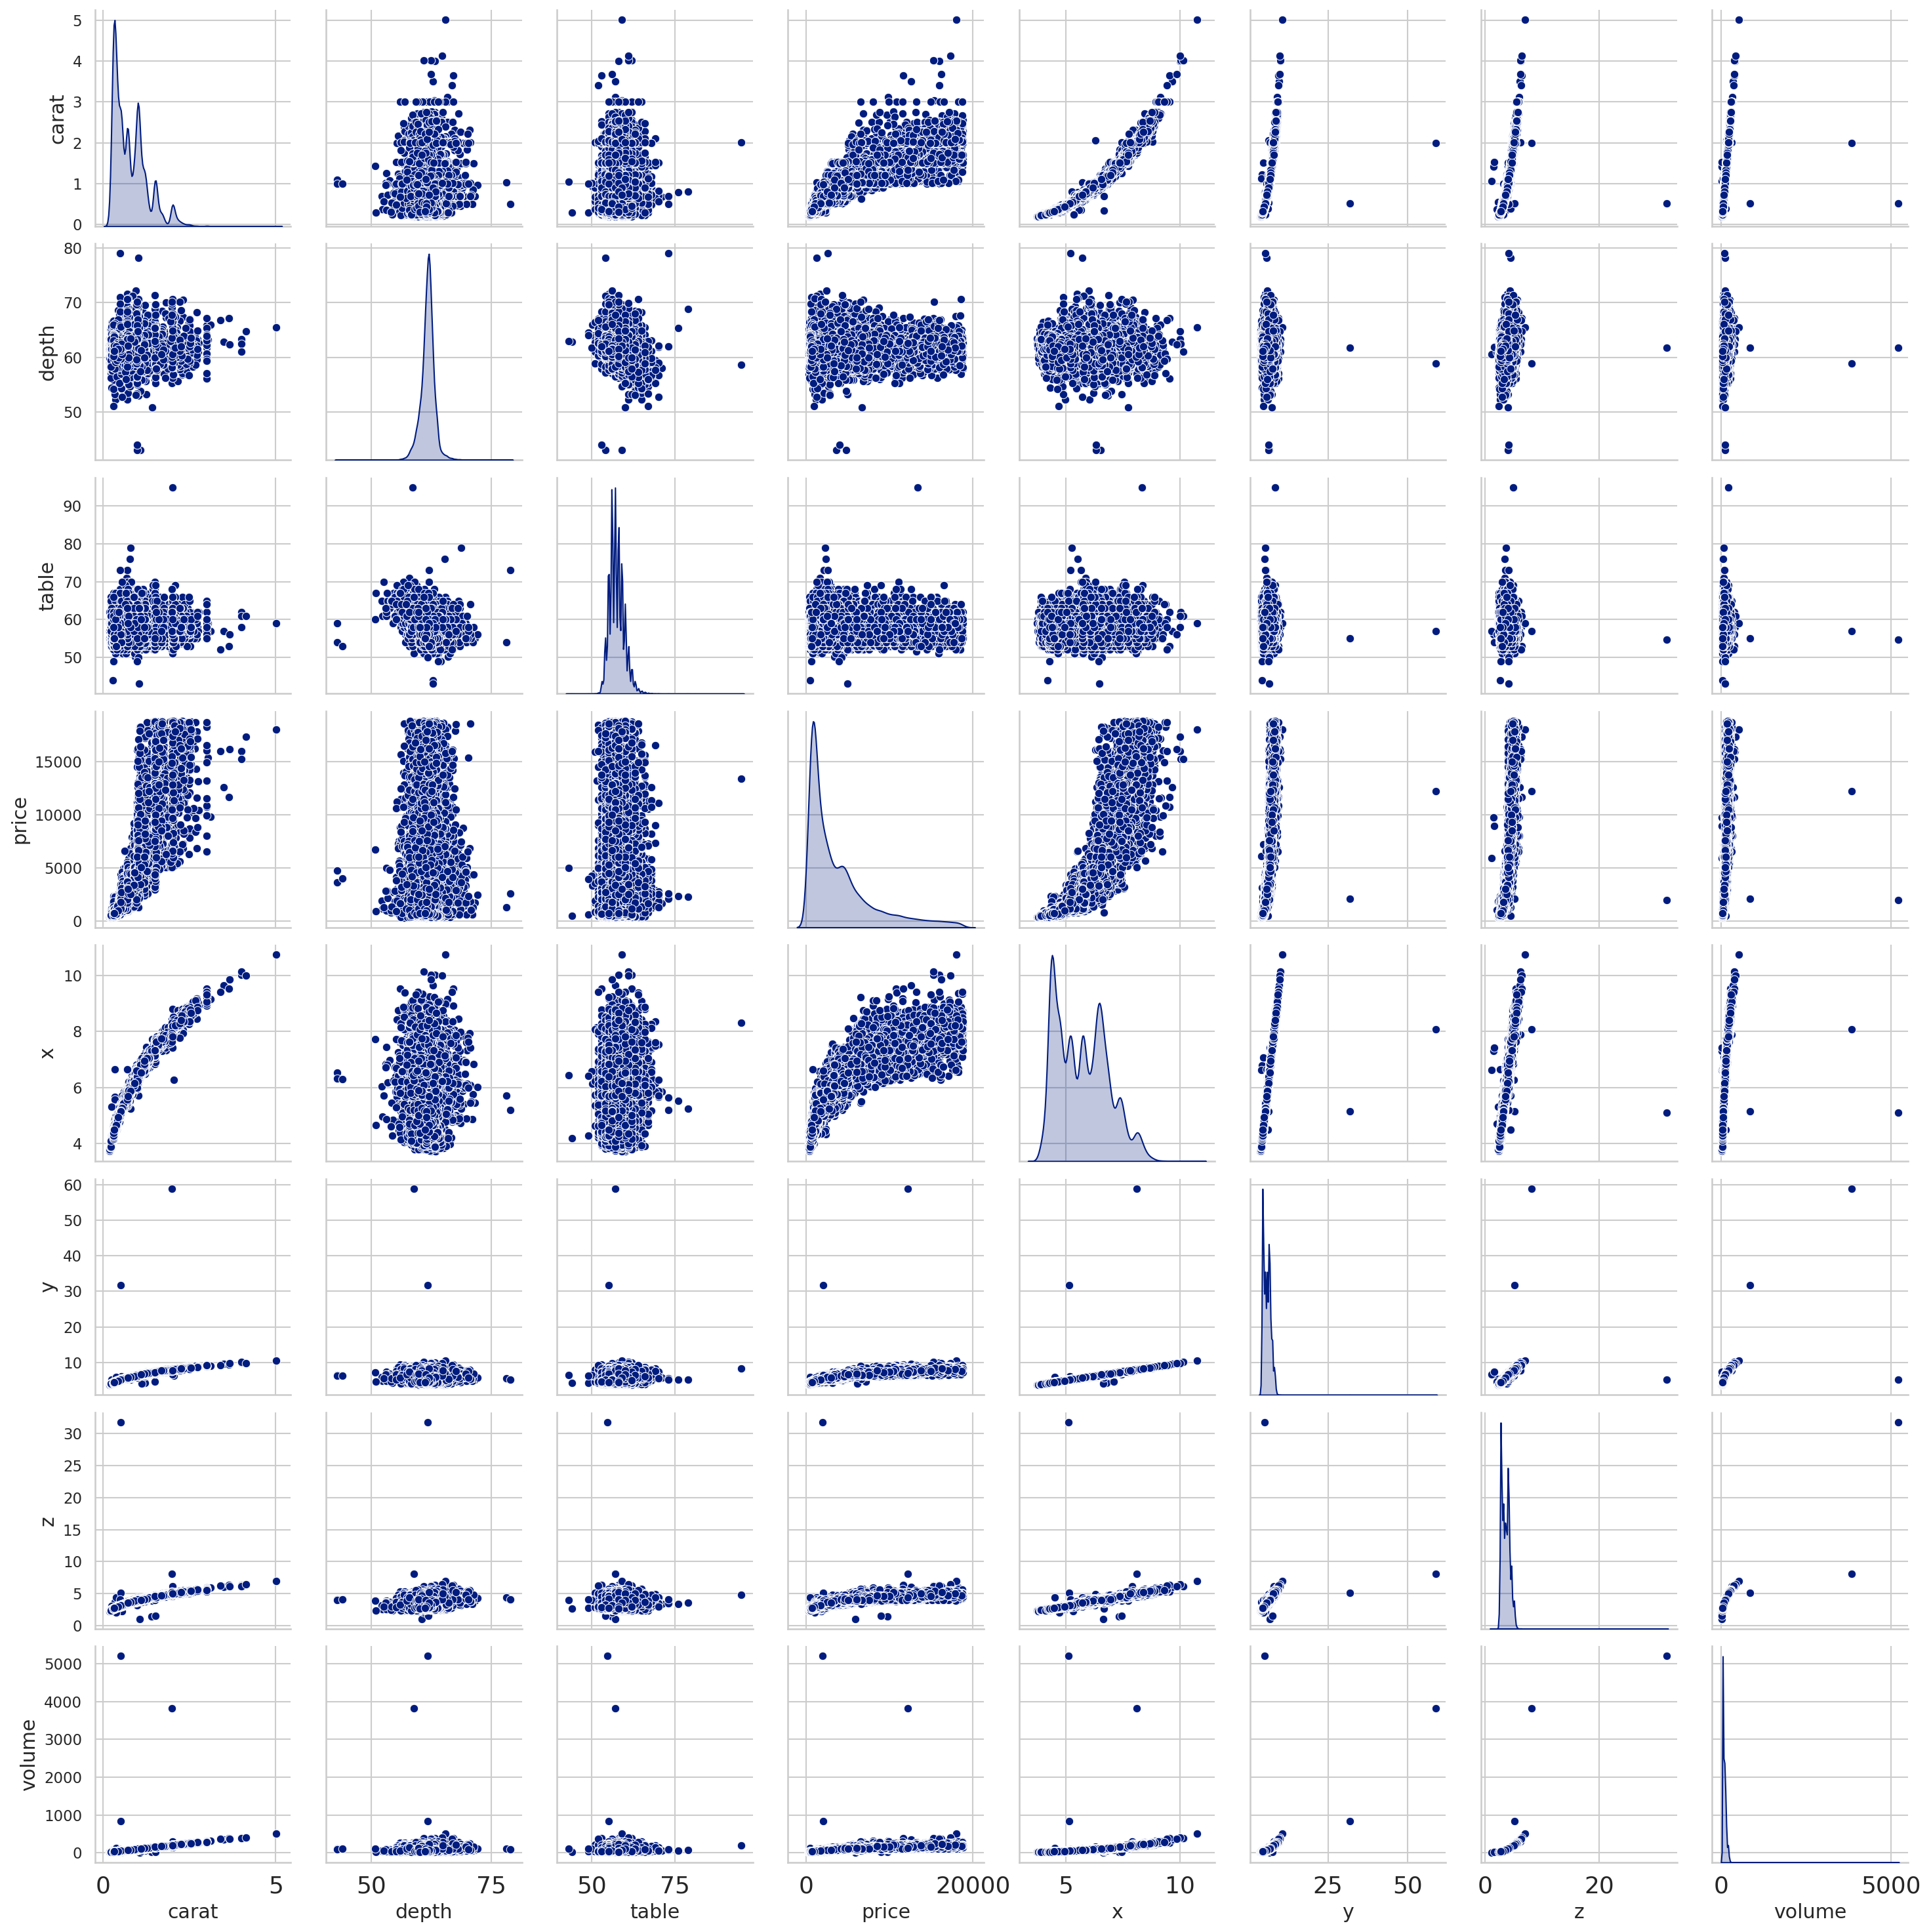

In [123]:
plt.figure()
sns.pairplot(df , diag_kind="kde")

- **We can see that our price target feature is highly correlated to `['lenght','width','depth','volume']` and most to `carat` features.**

- **And `carat` features being also high correlated to the `['lenght','width','depth']` features.**

- **Seems like `['lenght','width','depth']` features can be dropped since they are highly correlated to each other and to the `carat` feature.**

- **Finally, Our encoded categorical features have nealry negative linear relation to our price target and most features.**


## **Price Target Feature Analysis**


In [124]:
fig1 = px.histogram(df, x='cut', y='price', title=" Total Price of Cut Categories", height=400)
fig2 = px.histogram(df, x='clarity',y='price', barmode='group',title="Total Price of Clarity Categoreis", height=400)
fig3 = px.histogram(df, x='color',y='price', barmode='group',title="Total Price of Clarity Categoreis", height=400)

fig1.show()
fig2.show()
fig3.show()

- **The highest cut `Ideal` have the most prices in the data.**

- **But the highest clarity `IF` have small sum of prices due to it's small portion in data.**

- **And also the Best color `D` have small sum of prices compared to `G` color.**


In [125]:
px.histogram(df, x='cut',y='price',color='color', barmode='group',title="Total Price of Cut Colors")

- **Although J is the Best Color, G is having most high prices along the cuts.**


In [126]:
px.histogram(df, x='clarity',y='price',color='color', barmode='group',title="Total Price of Clarity Color")

- **Also here, the Best Clarity `IF` have small prices due to it's small portion, and Interstingly not only `G` has the most prices among clarities also `H` has similar high prices.**


<Figure size 3750x1500 with 0 Axes>

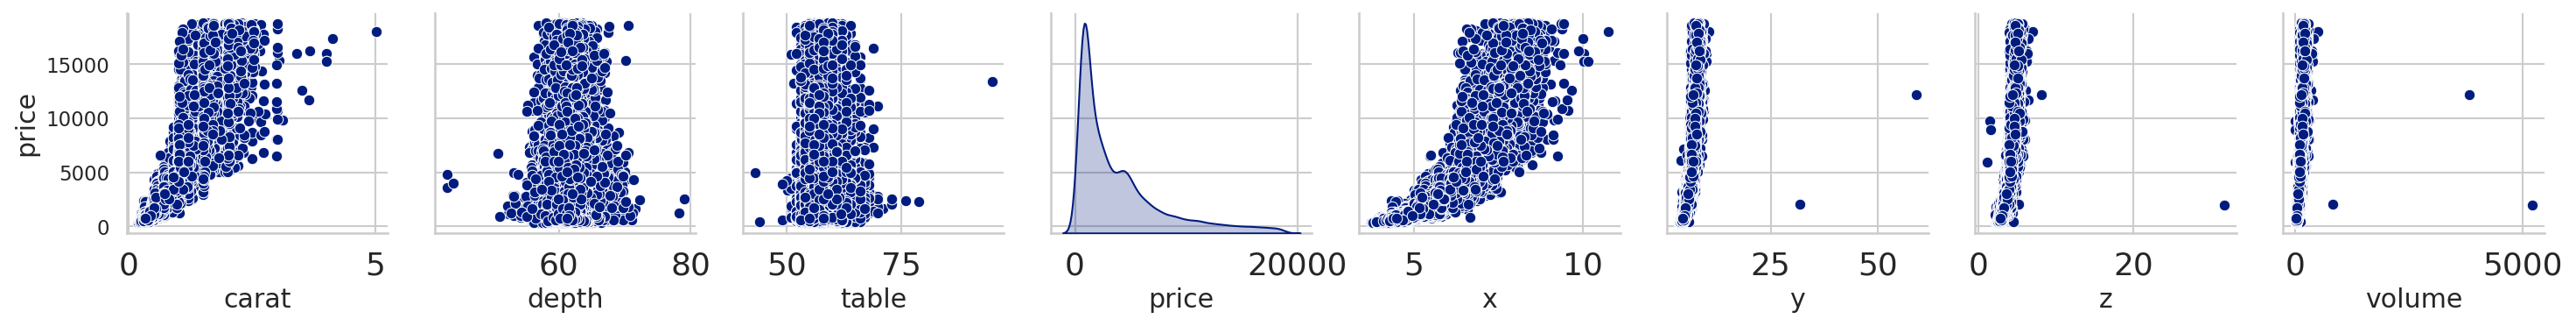

In [127]:
plt.figure(figsize=(25,10))

sns.pairplot(df , diag_kind="kde", y_vars='price')

- **We can see that our assumptions about the correlation between the price features and `['cut','lenght','width','depth']` are correct they are clearly linearly correlated.**


### **MI Scores**


> **Let's calculate MI scores to detect non-linear relationships, Unlike correlation that can only detect linear relationships.**


In [129]:
df_encoded.head()

carat  depth  table  price     x     y     z      cut color clarity  \
0   1.06   61.8   57.0   4270  6.57  6.60  4.07    Ideal     I     SI2   
1   1.51   60.9   58.0  15164  7.38  7.42  4.51  Premium     G    VVS2   
2   0.32   61.3   56.0    828  4.43  4.41  2.71    Ideal     F     VS2   
3   0.53   61.2   56.0   1577  5.19  5.22  3.19    Ideal     G     VS2   
4   0.70   61.0   57.0   2596  5.76  5.72  3.50  Premium     H    VVS2   

   cut_encoded  color_encoded  clarity_encoded      volume  
0            2              5                3  109.328340  
1            3              3                7  150.923542  
2            2              2                5   32.387481  
3            2              3                5   53.119242  
4            3              4                7   70.070000

In [130]:
df_encoded['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
df_encoded['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
df_encoded['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

test['cut'].replace(('Fair','Good','Very Good','Premium','Ideal'),(1,2,3,4,5), inplace = True)
test['color'].replace(('D','E','F','G','H','I','J'),(7,6,5,4,3,2,1), inplace = True)
test['clarity'].replace(('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),(1,2,3,4,5,6,7,8),inplace = True)

In [131]:
from sklearn.feature_selection import mutual_info_regression

X = df_encoded.copy()
y = X.pop("price")

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

In [132]:
MI_Score = pd.DataFrame(mi_scores)
MI_Score.style.background_gradient(cmap='YlOrRd',axis=0)

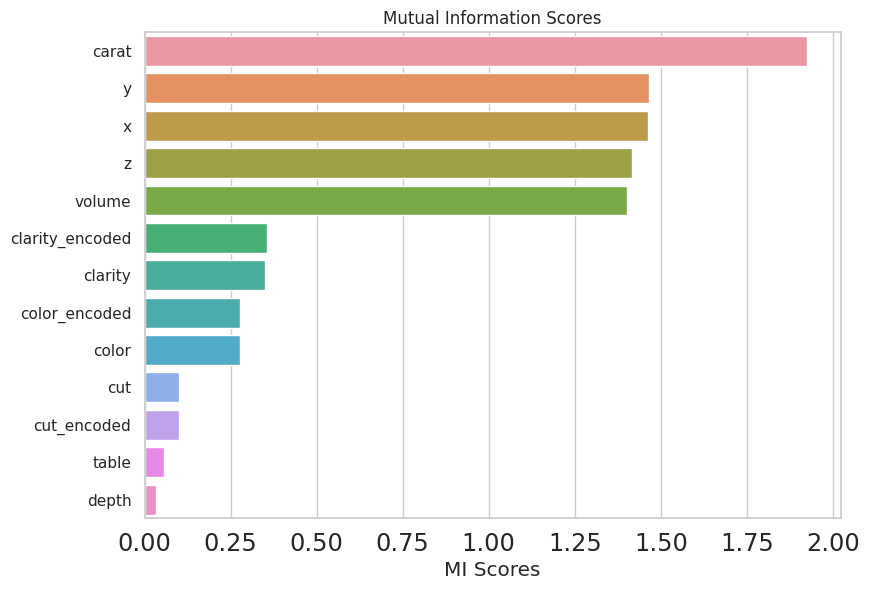

In [133]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=False)
    sns.barplot(x = scores, y = scores.index)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 6))
plot_mi_scores(mi_scores)

- **There are also non-linear relation between the price features and `['carat','lenght','width','depth','volume']` and not only linear.**

- **And Interstengily, Our encoded categorical features seems to have a non linear relation with our target.**

# **Data Preprocessing**


## **Removing Outliers**


In [134]:
df_encoded.describe().T

count         mean          std         min       25%  \
carat            43038.0     0.797475     0.472928    0.200000    0.4000   
depth            43038.0    61.746582     1.434702   43.000000   61.0000   
table            43038.0    57.459375     2.233822   43.000000   56.0000   
price            43038.0  3928.189112  3982.731057  326.000000  948.0000   
x                43038.0     5.731744     1.118784    3.730000    4.7100   
y                43038.0     5.735116     1.146848    3.680000    4.7200   
z                43038.0     3.539926     0.704559    1.070000    2.9100   
cut_encoded      43038.0     2.555858     1.027032    0.000000    2.0000   
color_encoded    43038.0     2.593545     1.702062    0.000000    1.0000   
clarity_encoded  43038.0     3.831846     1.725014    0.000000    2.0000   
volume           43038.0    80.355902    56.318121    7.636483   40.1998   

                         50%          75%        max  
carat               0.700000     1.040000      5.010  
depth              61.800000    62.500000     79.000  
table              57.000000    59.000000     95.000  
price            2401.000000  5311.750000  18823.000  
x                   5.700000     6.540000     10.740  
y                   5.710000     6.540000     58.900  
z                   3.530000     4.040000     31.800  
cut_encoded         2.000000     3.000000      4.000  
color_encoded       3.000000     4.000000      6.000  
clarity_encoded     4.000000     5.000000      7.000  
volume             71.120416   105.403441   5207.886

In [135]:
pd.DataFrame([df_encoded.select_dtypes(exclude='category').skew(),df_encoded.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat     depth     table     price         x           y  \
Skewness  1.107532 -0.158412  0.803939  1.616431  0.395215    2.937721   
Kurtosis  1.213574  5.813470  3.132470  2.169261 -0.709779  112.525664   

                  z  cut_encoded  color_encoded  clarity_encoded       volume  
Skewness   1.869989    -0.192974       0.193410         0.174761    25.073192  
Kurtosis  59.316217    -0.458502      -0.860414        -0.817893  2051.524534

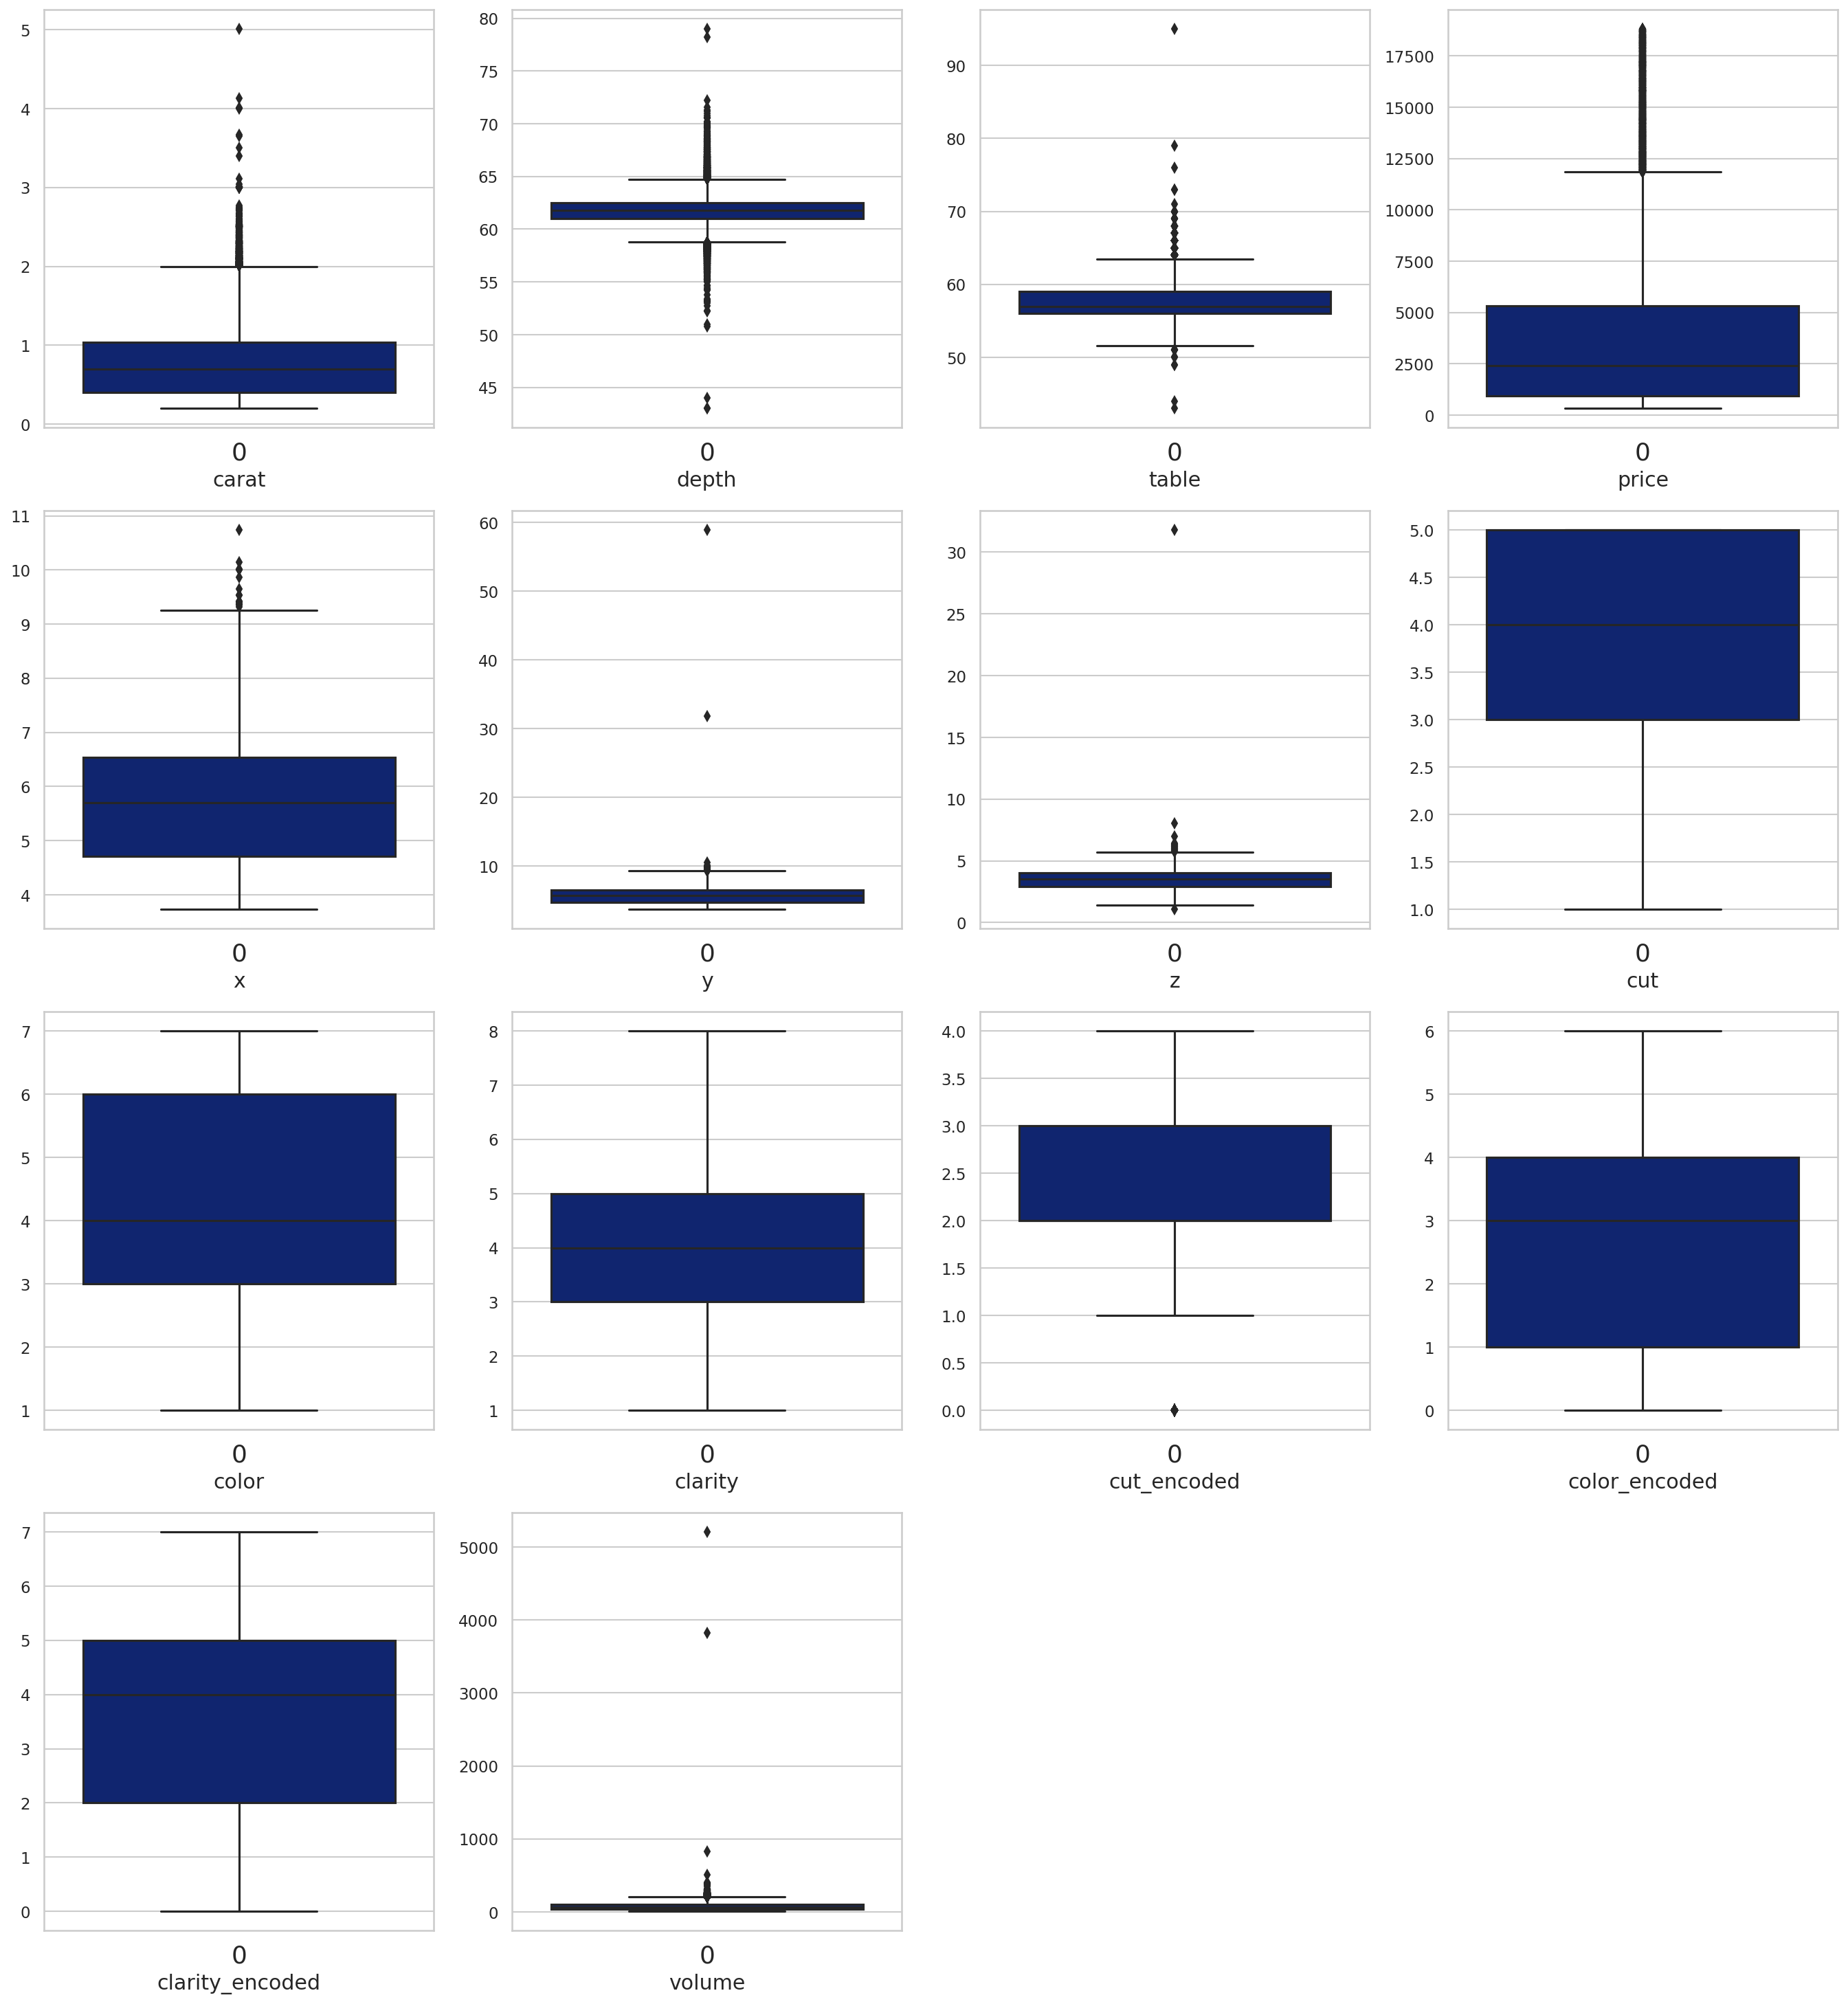

In [136]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df_encoded.columns):

        ax = plt.subplot(6, 4, i+1)

        sns.boxplot(df_encoded[col] , ax=ax)

        plt.xlabel(col)
        
plt.show()

> **As we said `['width','depth','table_width','depth%','volume']` features have outliers that we need to handle.**


- **We will not remove the outliers rows but we will set it first to be NaNs then Impute them.**


In [140]:
clean_df = df_encoded.copy()

outliers_cols = ['x','z','volume']

# setting values that above or lower than the whiskers in the box plot to NaNs
for col in outliers_cols:

    data = clean_df[col]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
 
    outliers = ( (data < min) | (data > max) )

    clean_df.loc[outliers, col] = np.nan
    
clean_df.isna().sum()

carat                 0
depth                 0
table                 0
price                 0
x                    16
y                     0
z                    22
cut                   0
color                 0
clarity               0
cut_encoded           0
color_encoded         0
clarity_encoded       0
volume             1074
dtype: int64

In [141]:
clean_df

carat  depth  table  price     x     y     z cut color clarity  \
0       1.06   61.8   57.0   4270  6.57  6.60  4.07   5     2       2   
1       1.51   60.9   58.0  15164  7.38  7.42  4.51   4     4       6   
2       0.32   61.3   56.0    828  4.43  4.41  2.71   5     5       4   
3       0.53   61.2   56.0   1577  5.19  5.22  3.19   5     4       4   
4       0.70   61.0   57.0   2596  5.76  5.72  3.50   4     3       6   
...      ...    ...    ...    ...   ...   ...   ...  ..   ...     ...   
43147   0.52   61.5   56.0   1760  5.16  5.18  3.18   5     6       4   
43148   0.72   62.1   59.0   3016  5.70  5.73  3.55   3     7       4   
43149   0.44   61.5   58.0    990  4.95  4.87  3.02   4     2       7   
43150   0.31   60.2   58.0    734  4.38  4.43  2.65   4     6       5   
43151   0.33   61.2   55.0    743  4.49  4.46  2.74   5     4       4   

       cut_encoded  color_encoded  clarity_encoded      volume  
0                2              5                3  109.328340  
1                3              3                7  150.923542  
2                2              2                5   32.387481  
3                2              3                5   53.119242  
4                3              4                7   70.070000  
...            ...            ...              ...         ...  
43147            2              1                5   52.382232  
43148            4              0                5   72.212325  
43149            3              5                6   44.416348  
43150            3              1                4   31.109675  
43151            2              3                5   33.483896  

[43038 rows x 14 columns]

- **We will Impute the NaN values using `IterativeImputer`**

- **It trains a regression model per feature to predict the missing values based on all the other available features.**


In [142]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=50)

clean_df = pd.DataFrame(imputer.fit_transform(clean_df), columns=clean_df.columns, index=clean_df.index)

clean_df.isna().sum()

carat              0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
cut                0
color              0
clarity            0
cut_encoded        0
color_encoded      0
clarity_encoded    0
volume             0
dtype: int64

In [143]:
clean_df.describe().T

count         mean          std         min       25%  \
carat            43038.0     0.797475     0.472928    0.200000    0.4000   
depth            43038.0    61.746582     1.434702   43.000000   61.0000   
table            43038.0    57.459375     2.233822   43.000000   56.0000   
price            43038.0  3928.189112  3982.731057  326.000000  948.0000   
x                43038.0     5.731203     1.117365    3.730000    4.7100   
y                43038.0     5.735116     1.146848    3.680000    4.7200   
z                43038.0     3.539056     0.690681    1.410000    2.9100   
cut              43038.0     3.904805     1.114899    1.000000    3.0000   
color            43038.0     4.406455     1.702062    1.000000    3.0000   
clarity          43038.0     4.046076     1.649024    1.000000    3.0000   
cut_encoded      43038.0     2.555858     1.027032    0.000000    2.0000   
color_encoded    43038.0     2.593545     1.702062    0.000000    1.0000   
clarity_encoded  43038.0     3.831846     1.725014    0.000000    2.0000   
volume           43038.0    80.043402    46.872570    7.636483   40.1998   

                         50%          75%           max  
carat               0.700000     1.040000      5.010000  
depth              61.800000    62.500000     79.000000  
table              57.000000    59.000000     95.000000  
price            2401.000000  5311.750000  18823.000000  
x                   5.700000     6.540000      9.419980  
y                   5.710000     6.540000     58.900000  
z                   3.530000     4.040000     10.467344  
cut                 4.000000     5.000000      5.000000  
color               4.000000     6.000000      7.000000  
clarity             4.000000     5.000000      8.000000  
cut_encoded         2.000000     3.000000      4.000000  
color_encoded       3.000000     4.000000      6.000000  
clarity_encoded     4.000000     5.000000      7.000000  
volume             71.118239   105.403441    493.724512

In [144]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43038 entries, 0 to 43151
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            43038 non-null  float64
 1   depth            43038 non-null  float64
 2   table            43038 non-null  float64
 3   price            43038 non-null  float64
 4   x                43038 non-null  float64
 5   y                43038 non-null  float64
 6   z                43038 non-null  float64
 7   cut              43038 non-null  float64
 8   color            43038 non-null  float64
 9   clarity          43038 non-null  float64
 10  cut_encoded      43038 non-null  float64
 11  color_encoded    43038 non-null  float64
 12  clarity_encoded  43038 non-null  float64
 13  volume           43038 non-null  float64
dtypes: float64(14)
memory usage: 5.9 MB


In [145]:
df

carat        cut color clarity  depth  table  price     x     y     z  \
0       1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07   
1       1.51    Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51   
2       0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71   
3       0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19   
4       0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
43147   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18  3.18   
43148   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73  3.55   
43149   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87  3.02   
43150   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43  2.65   
43151   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46  2.74   

           volume  
0      109.328340  
1      150.923542  
2       32.387481  
3       53.119242  
4       70.070000  
...           ...  
43147   52.382232  
43148   72.212325  
43149   44.416348  
43150   31.109675  
43151   33.483896  

[43038 rows x 11 columns]

In [146]:
clean_df

carat  depth  table    price     x     y     z  cut  color  clarity  \
0       1.06   61.8   57.0   4270.0  6.57  6.60  4.07  5.0    2.0      2.0   
1       1.51   60.9   58.0  15164.0  7.38  7.42  4.51  4.0    4.0      6.0   
2       0.32   61.3   56.0    828.0  4.43  4.41  2.71  5.0    5.0      4.0   
3       0.53   61.2   56.0   1577.0  5.19  5.22  3.19  5.0    4.0      4.0   
4       0.70   61.0   57.0   2596.0  5.76  5.72  3.50  4.0    3.0      6.0   
...      ...    ...    ...      ...   ...   ...   ...  ...    ...      ...   
43147   0.52   61.5   56.0   1760.0  5.16  5.18  3.18  5.0    6.0      4.0   
43148   0.72   62.1   59.0   3016.0  5.70  5.73  3.55  3.0    7.0      4.0   
43149   0.44   61.5   58.0    990.0  4.95  4.87  3.02  4.0    2.0      7.0   
43150   0.31   60.2   58.0    734.0  4.38  4.43  2.65  4.0    6.0      5.0   
43151   0.33   61.2   55.0    743.0  4.49  4.46  2.74  5.0    4.0      4.0   

       cut_encoded  color_encoded  clarity_encoded      volume  
0              2.0            5.0              3.0  109.328340  
1              3.0            3.0              7.0  150.923542  
2              2.0            2.0              5.0   32.387481  
3              2.0            3.0              5.0   53.119242  
4              3.0            4.0              7.0   70.070000  
...            ...            ...              ...         ...  
43147          2.0            1.0              5.0   52.382232  
43148          4.0            0.0              5.0   72.212325  
43149          3.0            5.0              6.0   44.416348  
43150          3.0            1.0              4.0   31.109675  
43151          2.0            3.0              5.0   33.483896  

[43038 rows x 14 columns]

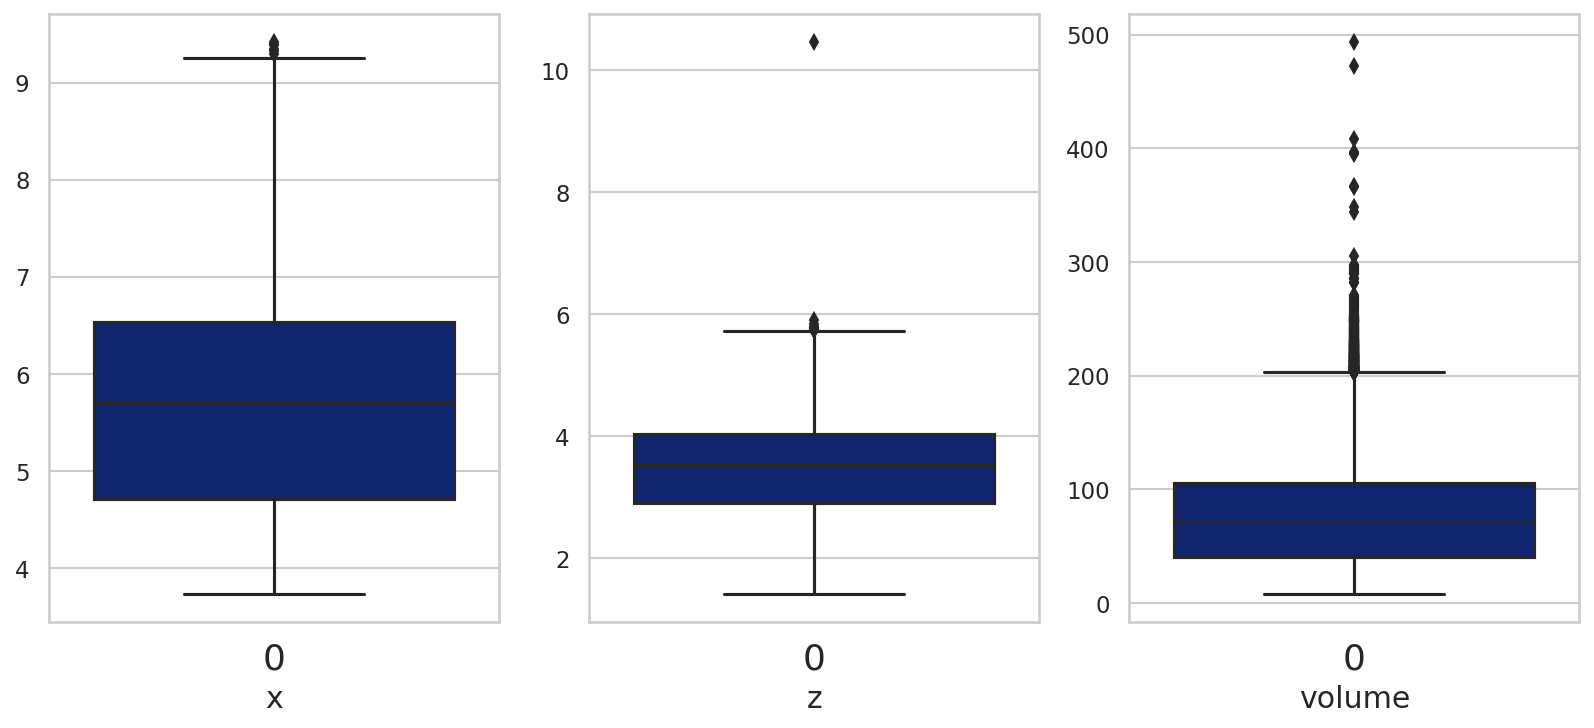

In [147]:
plt.figure(figsize=(20,5))

for i, col in enumerate(outliers_cols):

        ax = plt.subplot(1, 5, i+1)

        sns.boxplot(clean_df[col] , ax=ax)

        plt.xlabel(col)
        
plt.show()

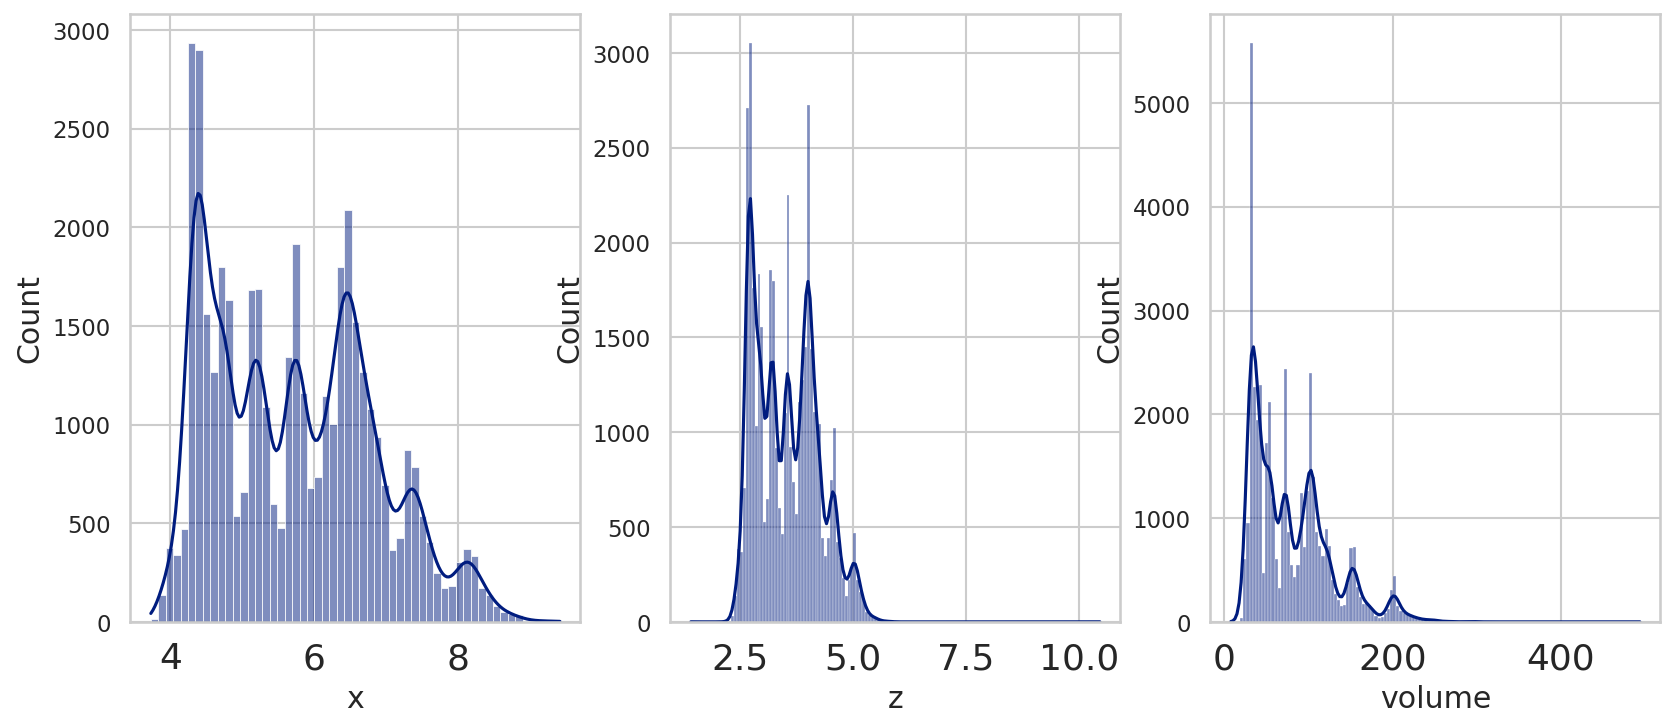

In [148]:
plt.figure(figsize=(20,5))

for i, col in enumerate(outliers_cols):

        ax = plt.subplot(1, 5, i+1)

        sns.histplot(clean_df[col] , ax=ax, kde=True)

        plt.xlabel(col)
        
plt.show()

In [149]:
pd.DataFrame([clean_df.select_dtypes(exclude='category').skew(),clean_df.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat     depth     table     price         x           y  \
Skewness  1.107532 -0.158412  0.803939  1.616431  0.387401    2.937721   
Kurtosis  1.213574  5.813470  3.132470  2.169261 -0.740530  112.525664   

                 z       cut     color   clarity  cut_encoded  color_encoded  \
Skewness  0.401578 -0.719675 -0.193410  0.555231    -0.192974       0.193410   
Kurtosis -0.524814 -0.385821 -0.860414 -0.389625    -0.458502      -0.860414   

          clarity_encoded    volume  
Skewness         0.174761  1.086987  
Kurtosis        -0.817893  1.180152

- **We can clearly notice the `iterativeImputer` changes in the `['width','depth','table_width','volume']` features, the outliers and features skewness is nearly gone.**

- **But not that much of a change in outlier on `'depth%'`.**


In [150]:
df_all = clean_df.copy()

df_all[['cut','color','clarity']] = df[['cut','color','clarity']] 

df = df_all.drop(columns=['cut_encoded','color_encoded','clarity_encoded'])

In [151]:
df

carat  depth  table    price     x     y     z        cut color  \
0       1.06   61.8   57.0   4270.0  6.57  6.60  4.07      Ideal     I   
1       1.51   60.9   58.0  15164.0  7.38  7.42  4.51    Premium     G   
2       0.32   61.3   56.0    828.0  4.43  4.41  2.71      Ideal     F   
3       0.53   61.2   56.0   1577.0  5.19  5.22  3.19      Ideal     G   
4       0.70   61.0   57.0   2596.0  5.76  5.72  3.50    Premium     H   
...      ...    ...    ...      ...   ...   ...   ...        ...   ...   
43147   0.52   61.5   56.0   1760.0  5.16  5.18  3.18      Ideal     E   
43148   0.72   62.1   59.0   3016.0  5.70  5.73  3.55  Very Good     D   
43149   0.44   61.5   58.0    990.0  4.95  4.87  3.02    Premium     I   
43150   0.31   60.2   58.0    734.0  4.38  4.43  2.65    Premium     E   
43151   0.33   61.2   55.0    743.0  4.49  4.46  2.74      Ideal     G   

      clarity      volume  
0         SI2  109.328340  
1        VVS2  150.923542  
2         VS2   32.387481  
3         VS2   53.119242  
4        VVS2   70.070000  
...       ...         ...  
43147     VS2   52.382232  
43148     VS2   72.212325  
43149    VVS1   44.416348  
43150     VS1   31.109675  
43151     VS2   33.483896  

[43038 rows x 11 columns]

In [152]:
df.isna().sum()

carat      0
depth      0
table      0
price      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
volume     0
dtype: int64

## **Applying Log Transformation**


> **To handle the Skewness in our Features**


In [153]:
pd.DataFrame([clean_df.select_dtypes(exclude='category').skew(),clean_df.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat     depth     table     price         x           y  \
Skewness  1.107532 -0.158412  0.803939  1.616431  0.387401    2.937721   
Kurtosis  1.213574  5.813470  3.132470  2.169261 -0.740530  112.525664   

                 z       cut     color   clarity  cut_encoded  color_encoded  \
Skewness  0.401578 -0.719675 -0.193410  0.555231    -0.192974       0.193410   
Kurtosis -0.524814 -0.385821 -0.860414 -0.389625    -0.458502      -0.860414   

          clarity_encoded    volume  
Skewness         0.174761  1.086987  
Kurtosis        -0.817893  1.180152

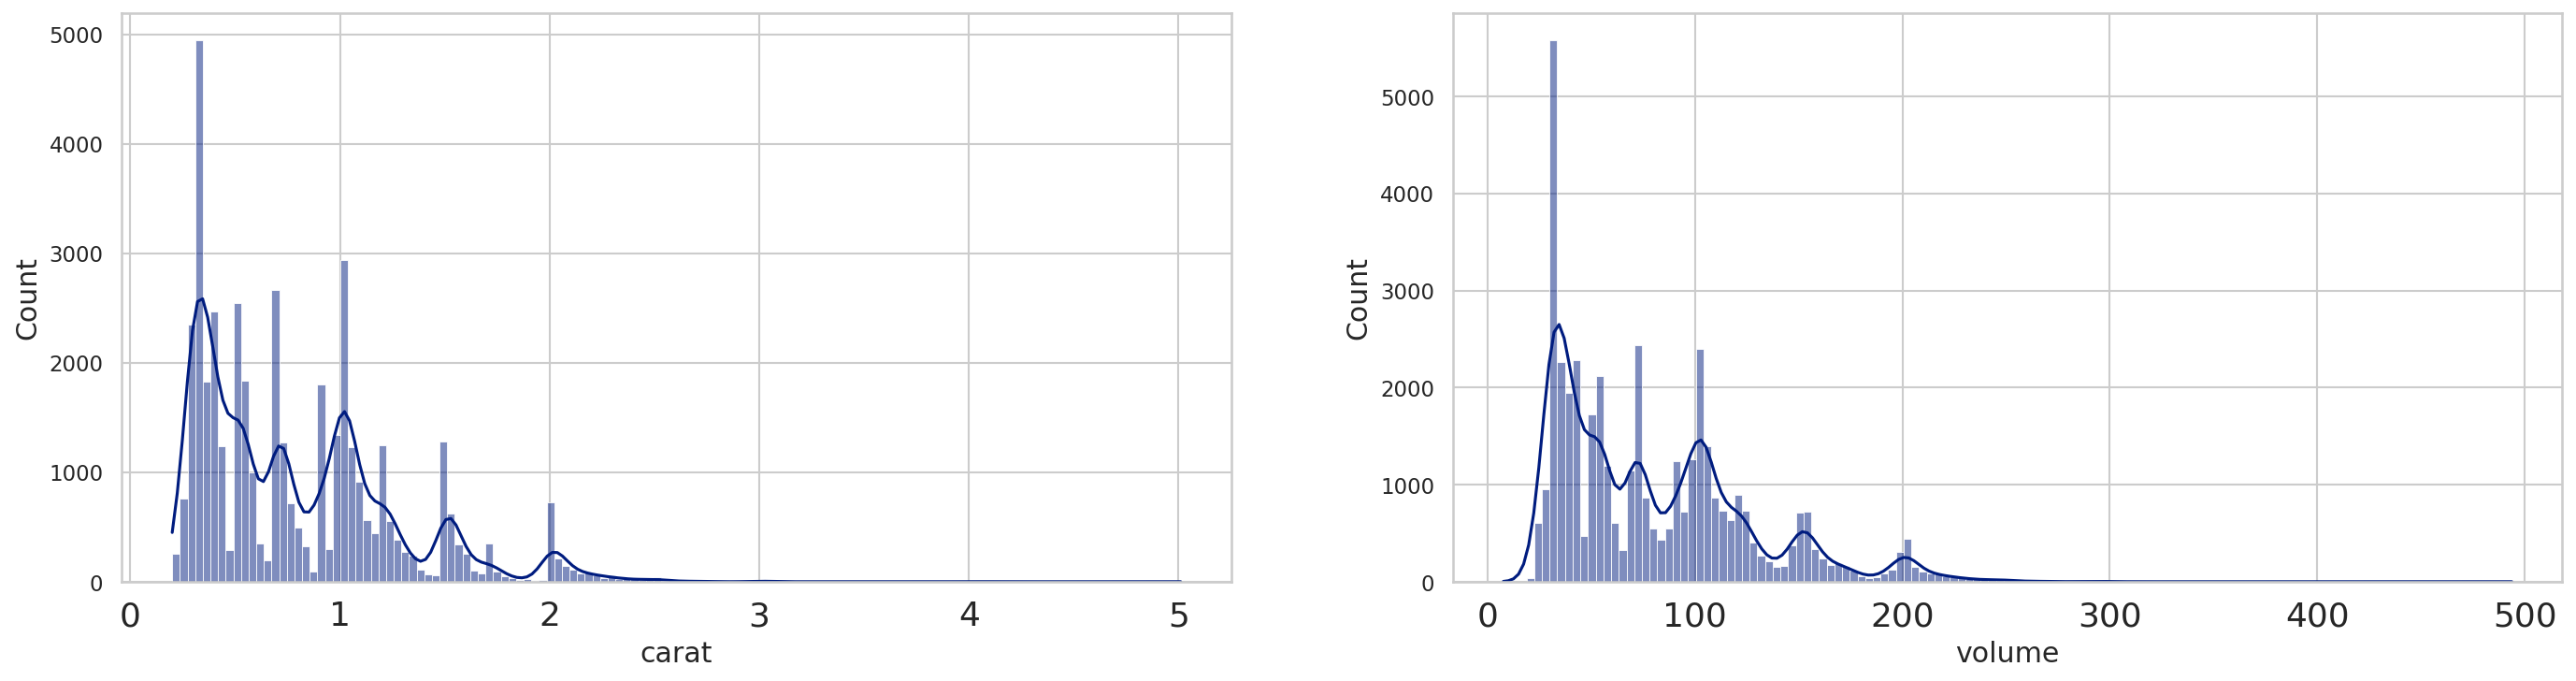

In [154]:
Skewed_Cols = clean_df[['carat','volume']].columns

plt.figure(figsize=(20,5))

for i, col in enumerate(clean_df[Skewed_Cols]):

        ax = plt.subplot(1, 2, i+1)

        sns.histplot(clean_df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

In [157]:
trans_df = clean_df.copy()

for col in Skewed_Cols:
    trans_df[col] = np.log(1 + trans_df[col])

In [ ]:
plt.figure(figsize=(20,5))

for i, col in enumerate(trans_df[Skewed_Cols]):

        ax = plt.subplot(1, 2, i+1)

        sns.histplot(trans_df[col] , ax=ax , kde=True)

        plt.xlabel(col)
        
plt.show()

In [158]:
pd.DataFrame([trans_df.select_dtypes(exclude='category').skew(),trans_df.select_dtypes(exclude='category').kurt()] , index=["Skewness","Kurtosis"])

carat     depth     table     price         x           y  \
Skewness  0.576470 -0.158412  0.803939  1.616431  0.387401    2.937721   
Kurtosis -0.456613  5.813470  3.132470  2.169261 -0.740530  112.525664   

                 z       cut     color   clarity  cut_encoded  color_encoded  \
Skewness  0.401578 -0.719675 -0.193410  0.555231    -0.192974       0.193410   
Kurtosis -0.524814 -0.385821 -0.860414 -0.389625    -0.458502      -0.860414   

          clarity_encoded    volume  
Skewness         0.174761  0.101857  
Kurtosis        -0.817893 -1.062450

- **`['carat']` features didn't have siginificant changes unlike `['volume']` that has become more normally distributed.**


## **Scaling Features**


> **Changes Values but keeps the features as the same distribution.**


In [159]:
from sklearn.preprocessing import StandardScaler

df_scaled = trans_df.drop(columns=['price']).copy()

Scaler = StandardScaler()

scaled_data = Scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(scaled_data, columns=df_scaled.columns)

df_scaled

carat     depth     table         x         y         z       cut  \
0      0.685151  0.037233 -0.205648  0.750701  0.754149  0.768733  0.982338   
1      1.493097 -0.590082  0.242021  1.475630  1.469161  1.405793  0.085385   
2     -1.134879 -0.311275 -0.653316 -1.164542 -1.155456 -1.200360  0.982338   
3     -0.531155 -0.380977 -0.653316 -0.484362 -0.449164 -0.505386  0.982338   
4     -0.100307 -0.520380 -0.205648  0.025773 -0.013181 -0.056548  0.085385   
...         ...       ...       ...       ...       ...       ...       ...   
43033 -0.557970 -0.171872 -0.653316 -0.511211 -0.484042 -0.519864  0.982338   
43034 -0.052479  0.246338  0.689689 -0.027926 -0.004461  0.015845 -0.811567   
43035 -0.779066 -0.171872  0.242021 -0.699156 -0.754352 -0.751522  0.085385   
43036 -1.165976 -1.077994  0.242021 -1.209290 -1.138016 -1.287231  0.085385   
43037 -1.104016 -0.380977 -1.100985 -1.110843 -1.111857 -1.156924  0.982338   

          color   clarity  cut_encoded  color_encoded  clarity_encoded  \
0     -1.413863 -1.240794    -0.541233       1.413863        -0.482231   
1     -0.238804  1.184911     0.432457       0.238804         1.836617   
2      0.348725 -0.027941    -0.541233      -0.348725         0.677193   
3     -0.238804 -0.027941    -0.541233       0.238804         0.677193   
4     -0.826333  1.184911     0.432457       0.826333         1.836617   
...         ...       ...          ...            ...              ...   
43033  0.936255 -0.027941    -0.541233      -0.936255         0.677193   
43034  1.523784 -0.027941     1.406148      -1.523784         0.677193   
43035 -1.413863  1.791338     0.432457       1.413863         1.256905   
43036  0.936255  0.578485     0.432457      -0.936255         0.097481   
43037 -0.238804 -0.027941    -0.541233       0.238804         0.677193   

         volume  
0      0.824344  
1      1.386751  
2     -1.276933  
3     -0.427813  
4      0.051193  
...         ...  
43033 -0.451918  
43034  0.103402  
43035 -0.736018  
43036 -1.345535  
43037 -1.220130  

[43038 rows x 13 columns]

In [160]:
df_scaled.describe()

carat         depth         table             x             y  \
count  4.303800e+04  4.303800e+04  4.303800e+04  4.303800e+04  4.303800e+04   
mean   4.533553e-16  9.072553e-15 -2.313994e-15 -1.510634e-16  2.284937e-16   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -1.524628e+00 -1.306668e+01 -6.473007e+00 -1.791023e+00 -1.791991e+00   
25%   -8.942640e-01 -5.203803e-01 -6.533164e-01 -9.139491e-01 -8.851464e-01   
50%   -1.003070e-01  3.723318e-02 -2.056479e-01 -2.792557e-02 -2.190044e-02   
75%    6.452557e-01  5.251450e-01  6.896890e-01  7.238520e-01  7.018310e-01   
max    5.063613e+00  1.202592e+01  1.680575e+01  3.301357e+00  4.635795e+01   

                  z           cut         color       clarity   cut_encoded  \
count  4.303800e+04  4.303800e+04  4.303800e+04  4.303800e+04  4.303800e+04   
mean   2.352627e-16  9.806738e-17 -1.431387e-16  7.660482e-17 -1.395066e-16   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -3.082581e+00 -2.605472e+00 -2.001392e+00 -1.847221e+00 -2.488615e+00   
25%   -9.107872e-01 -8.115673e-01 -8.263335e-01 -6.343679e-01 -5.412333e-01   
50%   -1.311249e-02  8.538535e-02 -2.388041e-01 -2.794144e-02 -5.412333e-01   
75%    7.252973e-01  9.823380e-01  9.362546e-01  5.784850e-01  4.324573e-01   
max    1.003121e+01  9.823380e-01  1.523784e+00  2.397764e+00  1.406148e+00   

       color_encoded  clarity_encoded        volume  
count   4.303800e+04     4.303800e+04  4.303800e+04  
mean    1.431387e-16     1.333981e-16  1.764883e-16  
std     1.000012e+00     1.000012e+00  1.000012e+00  
min    -1.523784e+00    -2.221368e+00 -3.654046e+00  
25%    -9.362546e-01    -1.061944e+00 -9.073133e-01  
50%     2.388041e-01     9.748075e-02  7.693269e-02  
75%     8.263335e-01     6.771929e-01  7.606651e-01  
max     2.001392e+00     1.836617e+00  3.462262e+00

## **Clustering with K-Means**


In [161]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

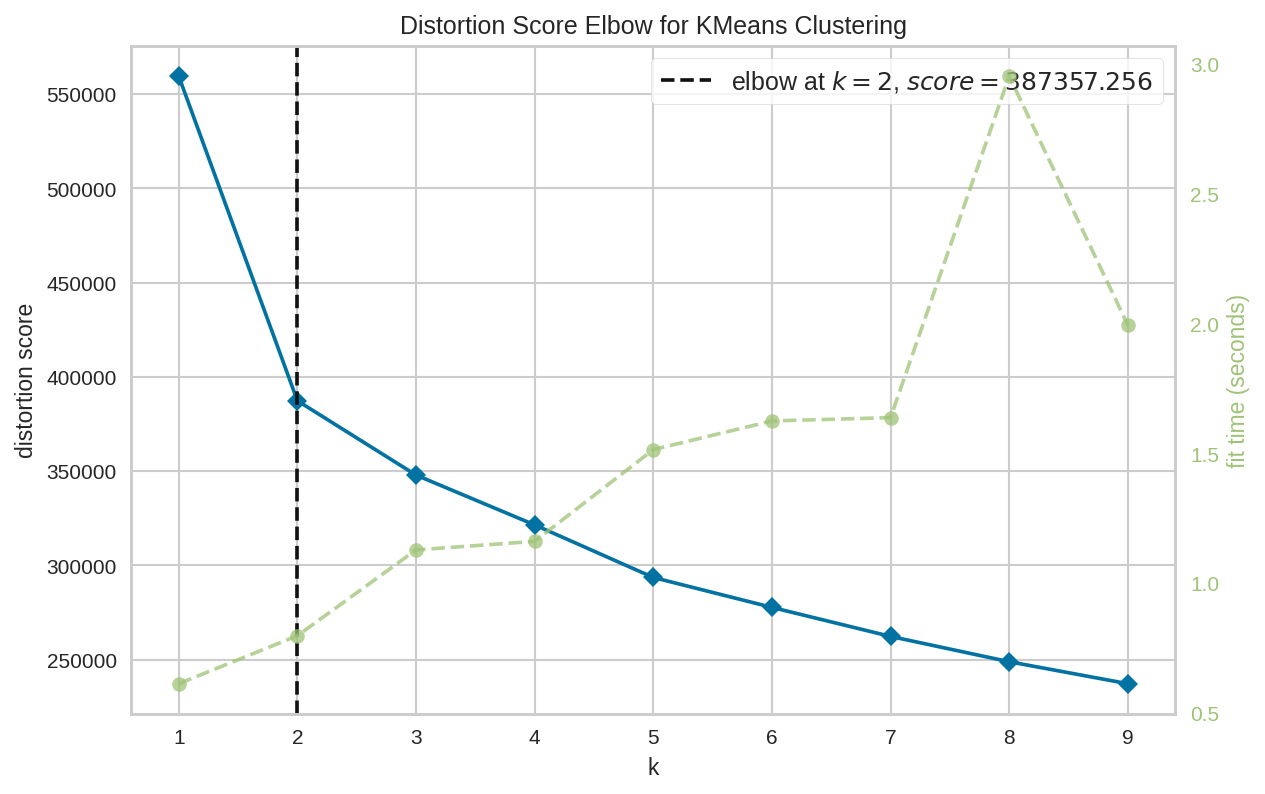

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [162]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init = 10)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

In [163]:
kmeans = KMeans(2, random_state=0, n_init = 10)

labels = kmeans.fit_predict(df_scaled)

print("Silhouette Score for 2 Clusters", silhouette_score(df_scaled, labels))

Silhouette Score for 2 Clusters 0.27365339918255716


In [164]:
kmeans = KMeans(3, random_state=0, n_init = 10)

labels = kmeans.fit_predict(df_scaled)

print("Silhouette Score for 3 Clusters", silhouette_score(df_scaled, labels))

Silhouette Score for 3 Clusters 0.19601731456137184


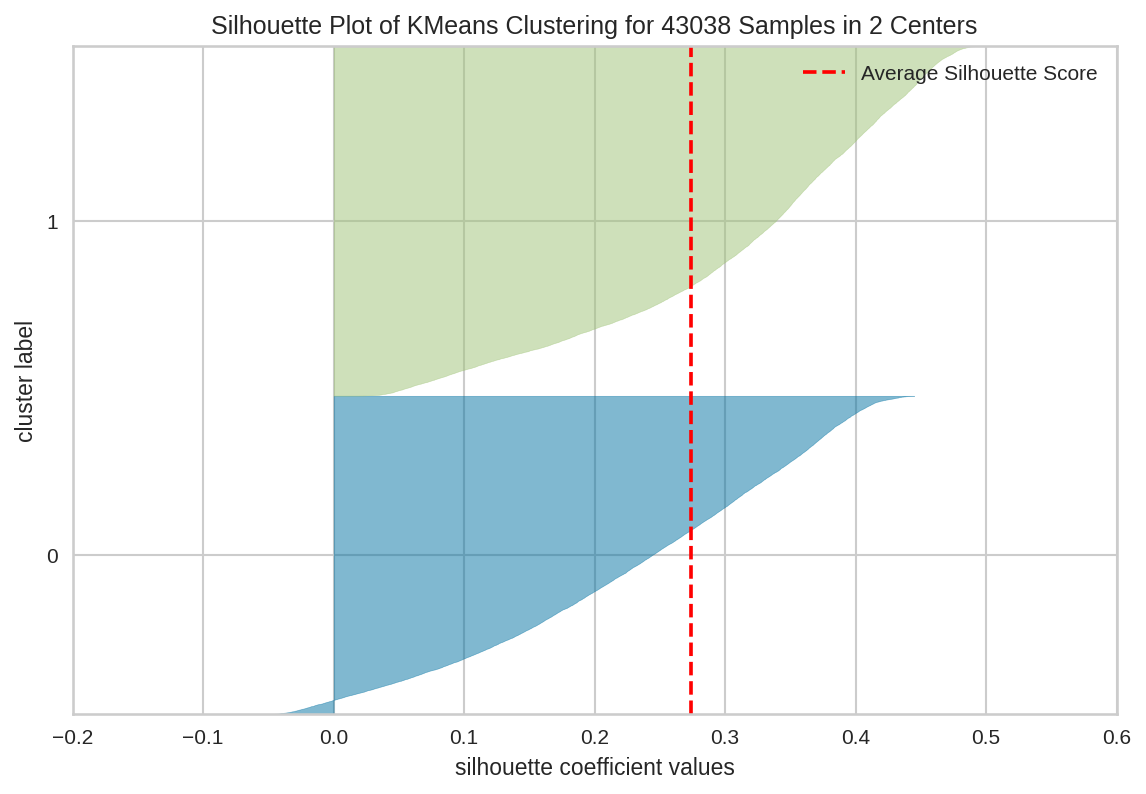

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 43038 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [165]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init = 10)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

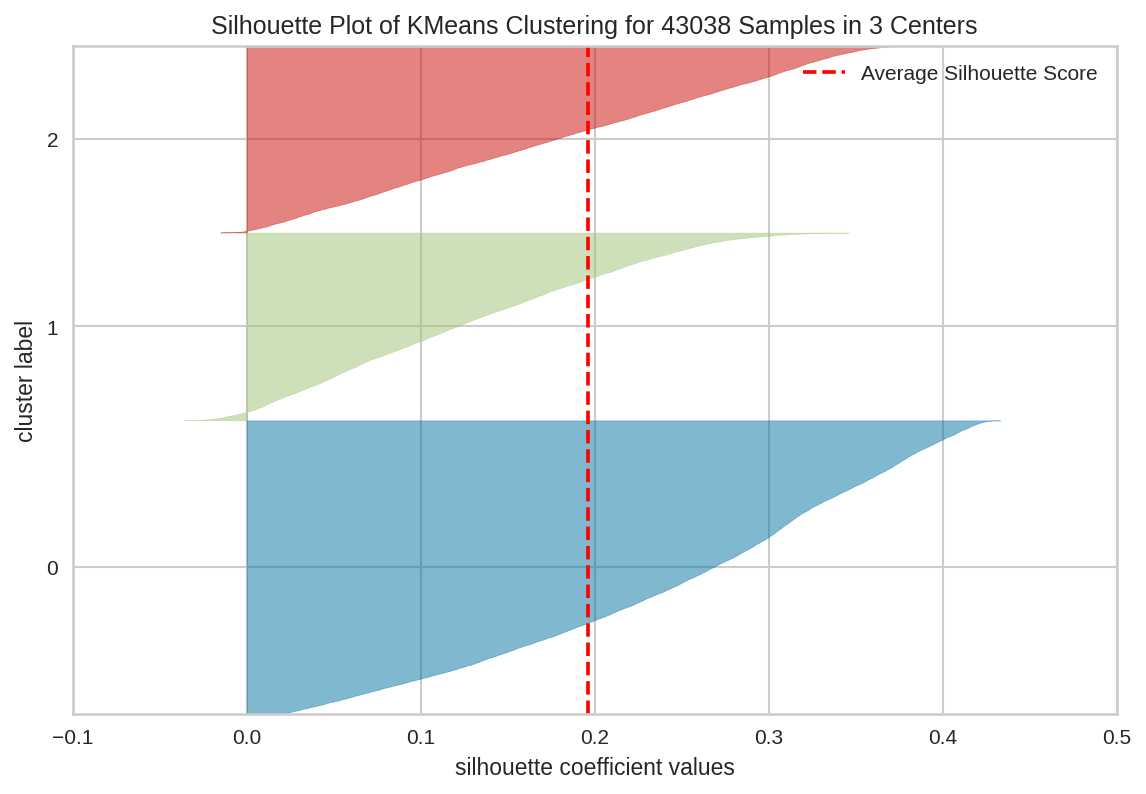

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 43038 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [166]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init = 10)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

- **Based on the Elbow Method and Silhouette Score, Seems Like Diamonds would be better grouped to 2 Clusters.**


In [167]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)

df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

df_scaled.head()

carat     depth     table         x         y         z       cut  \
0  0.685151  0.037233 -0.205648  0.750701  0.754149  0.768733  0.982338   
1  1.493097 -0.590082  0.242021  1.475630  1.469161  1.405793  0.085385   
2 -1.134879 -0.311275 -0.653316 -1.164542 -1.155456 -1.200360  0.982338   
3 -0.531155 -0.380977 -0.653316 -0.484362 -0.449164 -0.505386  0.982338   
4 -0.100307 -0.520380 -0.205648  0.025773 -0.013181 -0.056548  0.085385   

      color   clarity  cut_encoded  color_encoded  clarity_encoded    volume  \
0 -1.413863 -1.240794    -0.541233       1.413863        -0.482231  0.824344   
1 -0.238804  1.184911     0.432457       0.238804         1.836617  1.386751   
2  0.348725 -0.027941    -0.541233      -0.348725         0.677193 -1.276933   
3 -0.238804 -0.027941    -0.541233       0.238804         0.677193 -0.427813   
4 -0.826333  1.184911     0.432457       0.826333         1.836617  0.051193   

   Cluster  
0        0  
1        0  
2        1  
3        1  
4        1

## **Making Preproessing Pipeline**


- **We will make a pipelines for encoding categorical features and scaling for the numerical ones along with transforming skewed features and creating new cluster feature.**


In [168]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans


# this custom ClustersTransformer clusters the features and make new cluster feature before training the model
class ClustersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2, n_init=10, random_state=0):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_init = n_init
        
    def fit(self, X, y=None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init=self.n_init, random_state=self.random_state)
        self.kmeans.fit(X)
        return self
        
    def transform(self, X, y=None):
        clusters = self.kmeans.predict(X)
        clusters = clusters.reshape(-1, 1)
        X = np.concatenate((X, clusters), axis=1)
        return X

In [169]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PowerTransformer

catCols_pipeline = make_pipeline(OrdinalEncoder(categories=cat_orders))

numCols_pipeline = make_pipeline(StandardScaler())

skewedCols_pipeline = make_pipeline(PowerTransformer(copy=False))

clustering_pipeline = make_pipeline(ClustersTransformer(n_clusters=2))

In [170]:
skew_cols = ['carat','volume']

cat_cols = ['cut','color','clarity']

features_pipeline = ColumnTransformer([
    ('cat_features', catCols_pipeline, cat_cols),
    ('skew_features', skewedCols_pipeline, skew_cols),
    ] , remainder='passthrough')

In [ ]:
features_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_features',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]))]),
                                 ['cut', 'color', 'clarity']),
                                ('skew_features',
                                 Pipeline(steps=[('powertransformer',
                                                  PowerTransformer(copy=False))]),
                                 ['carat', 'volume'])])

In [171]:
preprocessing_pipeline = make_pipeline(
    features_pipeline,
    numCols_pipeline,
    ClustersTransformer()
)
preprocessing_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_features',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Premium',
                                                                                               'Ideal'],
                                                                                              ['J',
                                                                                               'I',
                                                                                               'H',
                                                                                               'G',
                                                                                               'F',
                                                                                               'E',
                                                                                               'D'],
                                                                                              ['I1',
                                                                                               'SI2',
                                                                                               'SI1',
                                                                                               'VS2',
                                                                                               'VS1',
                                                                                               'VVS2',
                                                                                               'VVS1',
                                                                                               'IF']]))]),
                                                  ['cut', 'color', 'clarity']),
                                                 ('skew_features',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(copy=False))]),
                                                  ['carat', 'volume'])])),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('clusterstransformer', ClustersTransformer())])

In [172]:
preprocessing_pipeline.fit_transform(df.drop(columns='price'))

pipeline_features_names = list(preprocessing_pipeline[:-1].get_feature_names_out())
pipeline_features_names.append('Cluster')

pd.DataFrame(preprocessing_pipeline.fit_transform(df.drop(columns='price')), columns= pipeline_features_names)

cat_features__cut  cat_features__color  cat_features__clarity  \
0               0.982338            -1.413863              -1.240794   
1               0.085385            -0.238804               1.184911   
2               0.982338             0.348725              -0.027941   
3               0.982338            -0.238804              -0.027941   
4               0.085385            -0.826333               1.184911   
...                  ...                  ...                    ...   
43033           0.982338             0.936255              -0.027941   
43034          -0.811567             1.523784              -0.027941   
43035           0.085385            -1.413863               1.791338   
43036           0.085385             0.936255               0.578485   
43037           0.982338            -0.238804              -0.027941   

       skew_features__carat  skew_features__volume  remainder__depth  \
0                  0.797368               0.835282          0.037233   
1                  1.403593               1.363120         -0.590082   
2                 -1.261586              -1.298661         -0.311275   
3                 -0.448873              -0.404497         -0.380977   
4                  0.046210               0.080579         -0.520380   
...                     ...                    ...               ...   
43033             -0.481887              -0.429270         -0.171872   
43034              0.097267               0.132629          0.246338   
43035             -0.764624              -0.723905         -0.171872   
43036             -1.307634              -1.372869         -1.077994   
43037             -1.216315              -1.237442         -0.380977   

       remainder__table  remainder__x  remainder__y  remainder__z  Cluster  
0             -0.205648      0.750701      0.754149      0.768733      0.0  
1              0.242021      1.475630      1.469161      1.405793      0.0  
2             -0.653316     -1.164542     -1.155456     -1.200360      1.0  
3             -0.653316     -0.484362     -0.449164     -0.505386      1.0  
4             -0.205648      0.025773     -0.013181     -0.056548      1.0  
...                 ...           ...           ...           ...      ...  
43033         -0.653316     -0.511211     -0.484042     -0.519864      1.0  
43034          0.689689     -0.027926     -0.004461      0.015845      0.0  
43035          0.242021     -0.699156     -0.754352     -0.751522      1.0  
43036          0.242021     -1.209290     -1.138016     -1.287231      1.0  
43037         -1.100985     -1.110843     -1.111857     -1.156924      1.0  

[43038 rows x 11 columns]

In [173]:
df_scaled

carat     depth     table         x         y         z       cut  \
0      0.685151  0.037233 -0.205648  0.750701  0.754149  0.768733  0.982338   
1      1.493097 -0.590082  0.242021  1.475630  1.469161  1.405793  0.085385   
2     -1.134879 -0.311275 -0.653316 -1.164542 -1.155456 -1.200360  0.982338   
3     -0.531155 -0.380977 -0.653316 -0.484362 -0.449164 -0.505386  0.982338   
4     -0.100307 -0.520380 -0.205648  0.025773 -0.013181 -0.056548  0.085385   
...         ...       ...       ...       ...       ...       ...       ...   
43033 -0.557970 -0.171872 -0.653316 -0.511211 -0.484042 -0.519864  0.982338   
43034 -0.052479  0.246338  0.689689 -0.027926 -0.004461  0.015845 -0.811567   
43035 -0.779066 -0.171872  0.242021 -0.699156 -0.754352 -0.751522  0.085385   
43036 -1.165976 -1.077994  0.242021 -1.209290 -1.138016 -1.287231  0.085385   
43037 -1.104016 -0.380977 -1.100985 -1.110843 -1.111857 -1.156924  0.982338   

          color   clarity  cut_encoded  color_encoded  clarity_encoded  \
0     -1.413863 -1.240794    -0.541233       1.413863        -0.482231   
1     -0.238804  1.184911     0.432457       0.238804         1.836617   
2      0.348725 -0.027941    -0.541233      -0.348725         0.677193   
3     -0.238804 -0.027941    -0.541233       0.238804         0.677193   
4     -0.826333  1.184911     0.432457       0.826333         1.836617   
...         ...       ...          ...            ...              ...   
43033  0.936255 -0.027941    -0.541233      -0.936255         0.677193   
43034  1.523784 -0.027941     1.406148      -1.523784         0.677193   
43035 -1.413863  1.791338     0.432457       1.413863         1.256905   
43036  0.936255  0.578485     0.432457      -0.936255         0.097481   
43037 -0.238804 -0.027941    -0.541233       0.238804         0.677193   

         volume  Cluster  
0      0.824344        0  
1      1.386751        0  
2     -1.276933        1  
3     -0.427813        1  
4      0.051193        1  
...         ...      ...  
43033 -0.451918        1  
43034  0.103402        1  
43035 -0.736018        1  
43036 -1.345535        1  
43037 -1.220130        1  

[43038 rows x 14 columns]

- **As we can see our pipeline give same results to the steps we applied through data preprcoessing.**


# **Modeling**


## **Splitting Data**


In [174]:
from sklearn.model_selection import train_test_split

train_df = df.copy()

X_Org = train_df.drop(columns='price')

y_Org = train_df['price']

X_trainOrg, X_testOrg, y_trainOrg, y_testOrg = train_test_split(X_Org, y_Org, test_size=0.1, random_state=0)

print(X_trainOrg.shape, y_trainOrg.shape)
print(X_testOrg.shape, y_testOrg.shape)

(38734, 10) (38734,)
(4304, 10) (4304,)


In [175]:
train_df = df_scaled.copy()

X = train_df

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(38734, 14) (38734,)
(4304, 14) (4304,)


> **Selecting Metrics**


In [176]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

def test_performence(model, modeling_pipeline, cv=10):
    
    # Training Set Performance
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_pred_train, y_train)
    mse_train = mean_squared_error(y_pred_train, y_train)
    rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)

    model_train_df = pd.DataFrame({'R2': round(r2_train,2),'MSE': round(mse_train,2),'RMSE': round(rmse_train,2)}, index= ['Model Train']).T
    
    # Training Set Performance
    y_pred_trainOrg = modeling_pipeline.predict(X_trainOrg)
    r2_train = r2_score(y_pred_trainOrg, y_trainOrg)
    mse_train = mean_squared_error(y_pred_trainOrg, y_trainOrg)
    rmse_train = mean_squared_error(y_pred_trainOrg, y_trainOrg, squared=False)

    pipeline_train_df = pd.DataFrame({'R2': round(r2_train,2) ,'MSE': round(mse_train,2)  ,'RMSE': round(rmse_train,2)}, index= ['Pipeline Train']).T
    
    
    # Testing Set Performance
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_pred_test, y_test)
    mse_test = mean_squared_error(y_pred_test, y_test)
    rmse_test = mean_squared_error(y_pred_test, y_test, squared=False)

    model_test_df = pd.DataFrame({'R2': round(r2_test,2),'MSE': round(mse_test,2) ,'RMSE': round(rmse_test,2)}, index= ['Model Test']).T
    
    # Testing Set Performance
    y_pred_testOrg = modeling_pipeline.predict(X_testOrg)
    r2_test = r2_score(y_pred_testOrg, y_testOrg)
    mse_test = mean_squared_error(y_pred_testOrg, y_testOrg)
    rmse_test = mean_squared_error(y_pred_testOrg, y_testOrg, squared=False)

    pipeline_test_df = pd.DataFrame({'R2': round(r2_test,2),'MSE': round(mse_test,2) ,'RMSE': round(rmse_test,2)}, index= ['Pipeline Test']).T

    results_df = pd.concat([model_train_df,pipeline_train_df,model_test_df,pipeline_test_df], axis=1)
    display(results_df.style.background_gradient(cmap='YlOrRd', axis=1))

    model_rmses = -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=cv)

    pipeline_rmses = -cross_val_score(modeling_pipeline, X_Org, y_Org, scoring="neg_root_mean_squared_error", cv=cv)

    cv_scores_df = pd.DataFrame([pd.Series(model_rmses).describe().T, pd.Series(pipeline_rmses).describe().T], index=['Model','Pipeline']).T
    display(cv_scores_df.style.background_gradient(cmap='BuPu', axis=0))

## **Feature Importance**


In [177]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=0)

clf.fit(X_train,y_train)

print("Random Forest Test Set R2 Score: " , clf.score(X_test,y_test), "\n" )

Random Forest Test Set R2 Score:  0.9813669971302054 



In [178]:
results = list(zip(X, clf.feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [179]:
from xgboost import XGBRegressor

clf = XGBRegressor(random_state=0)

clf.fit(X_train,y_train)

print("XGB Test Set R2 Score: " , clf.score(X_test,y_test), "\n" )

XGB Test Set R2 Score:  0.9819894933905372 



In [180]:
results = list(zip(X, clf.feature_importances_))

importance = pd.DataFrame(results, columns = ["Feature", "Importance"])

importance = importance.sort_values(by="Importance", ascending=False)

importance.sort_values(by="Importance" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

- **When it comes for predictions looks like the `['carat','width']` feautres are the most important ones.**


## **Traditional Models**


In [181]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    LinearRegression()
)

lr_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(lr_model, modeling_pipeline)

In [182]:
from sklearn.svm import LinearSVR

svm_model = LinearSVR()

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    LinearSVR()
)

svm_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(svm_model, modeling_pipeline)

In [183]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(5)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    KNeighborsRegressor(5)
)

knn_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(knn_model, modeling_pipeline)

In [184]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    DecisionTreeRegressor(random_state=0)
)

dt_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(dt_model, modeling_pipeline)

## **Boostings and Ensemble Models**


In [185]:
from sklearn.ensemble import GradientBoostingRegressor

gd_model = GradientBoostingRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    GradientBoostingRegressor(random_state=0)
)

gd_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(gd_model, modeling_pipeline)

In [186]:
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    BaggingRegressor(random_state=0)
)

bagging_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(bagging_model, modeling_pipeline)

In [187]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    RandomForestRegressor(random_state=0)
)

rf_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(rf_model, modeling_pipeline)

In [188]:
from sklearn.ensemble import ExtraTreesRegressor

extrees_model = ExtraTreesRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    ExtraTreesRegressor(random_state=0)
)

extrees_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(extrees_model, modeling_pipeline)

In [189]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    XGBRegressor(random_state=0)
)

xgb_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(xgb_model, modeling_pipeline)

In [190]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=0)

modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    LGBMRegressor(random_state=0)
)

lgb_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(lgb_model, modeling_pipeline)

In [191]:
from sklearn.ensemble import VotingRegressor

estimators = [('lgbm1', LGBMRegressor(random_state=0)),
              ('xgb1', XGBRegressor(random_state=0)),
              ('extrees', ExtraTreesRegressor(random_state=0)),]

voting_model = VotingRegressor(estimators=estimators, n_jobs =-1, verbose = True)


modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    VotingRegressor(estimators=estimators, n_jobs =-1, verbose = True)
)

voting_model.fit(X_train,y_train)

modeling_pipeline.fit(X_trainOrg, y_trainOrg)

test_performence(voting_model, modeling_pipeline)

- **We can notice that the `LGBMRegressor` is giving best results along with `ExtraTreesRegressor` and `XGBRegressor` , we will fine-tune them to get better scores.**


# **Fine-Tuning Models**


## **ExtraTrees Fine-Tuning**


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [ { 'n_estimators': [100,500,1000], 'max_depth' : [5,10,None],
                'max_features' : ['sqrt','log2','auto']}]

extrees_reg = ExtraTreesRegressor(random_state=0)

extrees_grid_search = GridSearchCV(extrees_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

extrees_grid_search.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, None],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [100, 500, 1000]}],
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
extrees_grid_search.best_score_

-549.8636392999907

In [ ]:
extrees_grid_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 1000}

## **XGBoost Fine-Tuning**


In [ ]:
from xgboost import XGBRegressor

param_grid = [
 {'n_estimators': [100,500,1000], 'max_depth': [5,10,None], 'min_samples_split' : [2, 4] ,
  'max_features' : ['sqrt','log2']},
 ]

xgb_reg = XGBRegressor(random_state=0)

xgb_grid_search = GridSearchCV(xgb_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1, n_jobs=-1)

xgb_grid_search.fit(X, y)

In [ ]:
xgb_grid_search.best_score_

-550.016215104578

In [ ]:
xgb_grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

## **LightGBM Fine-Tuning**


In [ ]:
param_grid = [
 {'num_leaves': [15, 20, 30], 'learning_rate' : [0.01, 0.1] ,
  'n_estimators' : [1000, 3000, 5000]},]

lgbm_reg = LGBMRegressor(random_state=0)

lgbm_grid_search = GridSearchCV(lgbm_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1, n_jobs=-1)

lgbm_grid_search.fit(X, y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=0), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'n_estimators': [1000, 3000, 5000],
                          'num_leaves': [15, 20, 30]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [ ]:
lgbm_grid_search.best_score_

-535.9533327835229

In [ ]:
lgbm_grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 3000, 'num_leaves': 20}

## **Voting Regressor with Best Models**


In [ ]:
lgb_model = LGBMRegressor(random_state=0, learning_rate = 0.01, n_estimators = 3000, num_leaves = 20)

xgb_model = XGBRegressor(random_state=0, max_features = 'sqrt', min_samples_split = 2, n_estimators = 100)

extrees_model = ExtraTreesRegressor(random_state=0, n_estimators = 1000, max_features = 'auto')

In [ ]:
estimators = [('lgbm', lgb_model),
              ('xgb', xgb_model),
              ('extrees', extrees_model),]

voting_model = VotingRegressor(estimators=estimators)


modeling_pipeline = make_pipeline(
    preprocessing_pipeline,
    VotingRegressor(estimators=estimators)
)

# **Making Submission**


In [ ]:
modeling_pipeline.fit(X_Org, y_Org)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat_features',
                                                                   Pipeline(steps=[('ordinalencoder',
                                                                                    OrdinalEncoder(categories=[['Fair',
                                                                                                                'Good',
                                                                                                                'Very '
                                                                                                                'Good',
                                                                                                                'Premium',
                                                                                                                'Ideal'],
                                                                                                               ['J',
                                                                                                                'I',
                                                                                                                'H',
                                                                                                                'G',
                                                                                                                'F',
                                                                                                                'E',
                                                                                                                'D'],
                                                                                                               ['I1',
                                                                                                                'SI2',
                                                                                                                'SI1',
                                                                                                                'VS2',
                                                                                                                'VS1',
                                                                                                                'VVS2',
                                                                                                                'VVS1',
                                                                                                                'IF']]))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clar...
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_features='sqrt',
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           min_samples_split=2,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                    

In [ ]:
test_comp_df = pd.read_csv('/content/Datasets/test.csv')

test_comp_df

Id  carat        cut color clarity  depth  table     x     y     z
0          1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1          2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2          3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3          4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4          5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
10783  10784   0.57      Ideal     H     VS1   60.9   56.0  5.34  5.36  3.26
10784  10785   1.05      Ideal     G     VS2   60.8   57.0  6.65  6.58  4.02
10785  10786   0.71      Ideal     E    VVS1   62.3   55.0  5.68  5.72  3.55
10786  10787   1.11    Premium     E     SI2   61.0   60.0  6.68  6.66  4.07
10787  10788   2.00    Premium     F     SI2   61.5   59.0  8.03  7.95  4.92

[10788 rows x 10 columns]

In [ ]:
test_comp_df.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth%', 'z':'depth','table':'table_width'}, inplace=True)

test_comp_df

Id  carat        cut color clarity  depth%  table_width  length  \
0          1   0.34      Ideal     G    VVS2    61.1         57.0    4.52   
1          2   0.71    Premium     E     VS2    62.7         58.0    5.74   
2          3   0.44  Very Good     I     VS1    62.8         56.0    4.83   
3          4   0.81    Premium     E     SI2    60.1         59.0    6.09   
4          5   0.40      Ideal     G    VVS1    61.2         56.0    4.74   
...      ...    ...        ...   ...     ...     ...          ...     ...   
10783  10784   0.57      Ideal     H     VS1    60.9         56.0    5.34   
10784  10785   1.05      Ideal     G     VS2    60.8         57.0    6.65   
10785  10786   0.71      Ideal     E    VVS1    62.3         55.0    5.68   
10786  10787   1.11    Premium     E     SI2    61.0         60.0    6.68   
10787  10788   2.00    Premium     F     SI2    61.5         59.0    8.03   

       width  depth  
0       4.48   2.75  
1       5.68   3.58  
2       4.88   3.05  
3       6.03   3.65  
4       4.80   2.92  
...      ...    ...  
10783   5.36   3.26  
10784   6.58   4.02  
10785   5.72   3.55  
10786   6.66   4.07  
10787   7.95   4.92  

[10788 rows x 10 columns]

In [ ]:
test_comp_df['volume'] = test_comp_df['depth'] * test_comp_df['width'] * test_comp_df['depth']

test_comp_df

Id  carat        cut color clarity  depth%  table_width  length  \
0          1   0.34      Ideal     G    VVS2    61.1         57.0    4.52   
1          2   0.71    Premium     E     VS2    62.7         58.0    5.74   
2          3   0.44  Very Good     I     VS1    62.8         56.0    4.83   
3          4   0.81    Premium     E     SI2    60.1         59.0    6.09   
4          5   0.40      Ideal     G    VVS1    61.2         56.0    4.74   
...      ...    ...        ...   ...     ...     ...          ...     ...   
10783  10784   0.57      Ideal     H     VS1    60.9         56.0    5.34   
10784  10785   1.05      Ideal     G     VS2    60.8         57.0    6.65   
10785  10786   0.71      Ideal     E    VVS1    62.3         55.0    5.68   
10786  10787   1.11    Premium     E     SI2    61.0         60.0    6.68   
10787  10788   2.00    Premium     F     SI2    61.5         59.0    8.03   

       width  depth      volume  
0       4.48   2.75   33.880000  
1       5.68   3.58   72.797152  
2       4.88   3.05   45.396200  
3       6.03   3.65   80.334675  
4       4.80   2.92   40.926720  
...      ...    ...         ...  
10783   5.36   3.26   56.963936  
10784   6.58   4.02  106.335432  
10785   5.72   3.55   72.086300  
10786   6.66   4.07  110.322234  
10787   7.95   4.92  192.440880  

[10788 rows x 11 columns]

In [ ]:
comp_pred = modeling_pipeline.predict(test_comp_df.drop(columns='Id'))

In [ ]:
sub = pd.DataFrame({'Id': test_comp_df['Id'], 'price':comp_pred })

sub

Id         price
0          1    878.984521
1          2   2911.747732
2          3    825.542901
3          4   2813.764506
4          5   1125.702824
...      ...           ...
10783  10784   1755.694323
10784  10785   6666.258490
10785  10786   4408.191845
10786  10787   4781.508210
10787  10788  13891.384676

[10788 rows x 2 columns]

In [ ]:
sub.to_csv('sub.csv',index=False)